<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

---
## Problem Statement
You are a data scientist in a well known real estate company located in Ames. In a bid to boost sales, the Board of Directors wants to provide free self-served platform to inform clients of the potential value of their homes. They would also like to find identify factors that might affect sale prices as higher sale prices equate to higher commission income. 

You have been tasked by your direct supervisor to create a regression model to predict the price of houses in Ames, so that these prices can be included in the platform. You will also need to identify factors affecting sales price and make recommendations on what could be done to improve sales income.

### Contents:
- [Datasets Used](#Datasets-Used)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analysis and Feature Engineering](#Exploratory-Data-Analysis-and-Feature-Engineering)
- [Initial Modelling](#Initial-Modelling)
- [Further EDA and Feature Engineering](#Further-EDA-and-Feature-Engineering)
- [Regularisation Regression](#Regularisation-Regression)
- [Model Test Results](#Model-Test-Results)
- [Predicting Sale Prices in Test Dataset](#Predicting-Sale-Prices-in-Test-Dataset)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

Ames is a city in Story County, Iowa, United States, located approximately 30 miles (48 km) north of Des Moines in central Iowa. ([*source*](https://en.wikipedia.org/wiki/Ames,_Iowa)). With a population of more than 65,000, Ames offers cultural, recreational, educational, business, and entertainment amenities more common in bigger metros. As a growing city, Ames continues to focus on building a strong community filled with opportunities for all. ([*source*](https://www.cityofames.org/about-ames))

## Datasets Used

For the purpose of the analysis, we are provided with the `train` and `test` datasets. The `train` dataset contains Ames' housing sales prices and their relevant information from 2006 to 2010. We will be using this dataset for model building purposes. The `test` dataset contains another set of Ames' housing sale price, but does not include the sale prices. We predicting the sale prices found in this dataset instead.

Information found in the `train` datasets includes information suchs as the sale prices, building class, information on the pool, basement, neighbourhood, garage and overall quality of the house. The full information could be found in the data dictionary below.

Information found in the `test` datasets contains the same fields as those found in thte `train` dataset, except for the sale prices.

## Data Import and Cleaning

Importing of Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as ax

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

**1. Importing of datasets being used:**

For the purpose of the project, we have imported the `test` and `train` datasets.

In [2]:
# Import datasets:
train = pd.read_csv("../datasets/train.csv")
test = pd.read_csv("../datasets/test.csv")

**2. Display datasets**

Display the first 5 rows of the imported datasets

In [3]:
# Setting to display all the columns
pd.set_option("display.max_columns", None)

# Display first 5 rows of the datasets
print("First 5 rows of the \"train\" dataset:")
display(train.head())
print("")
print("First 5 rows of the \"test\" dataset:")
display(test.head())

First 5 rows of the "train" dataset:


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500



First 5 rows of the "test" dataset:


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


**3. Remove space in column names**

Remove spaces found in column names for easier data cleaning.

In [4]:
# Remove space found in column names
train.columns = train.columns.str.replace(" ", "_")
test.columns = test.columns.str.replace(" ", "_")

# Changing column names to lower case
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

**4. Check column data types**

Check data types for all the columns, convert strings to numbers for numbers column.

In [5]:
print(train.dtypes.to_string())

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

There are no number columns being denominated as strings. However, there are several columns that could be denoted as float instead of integers. We will convert these columns to integers after we have investigated the null values.

**5. Check number of rows vs number of columns**

Check the number of rows and columns in the `train` dataset.

In [6]:
# Check number of rows vs number of columns
print(f"(Rows, Columns): {train.shape}")

(Rows, Columns): (2051, 81)


**6.1. Check for null values in the `train` dataset.**

In [7]:
# Check columns with null values
train_is_null = train.isnull().sum()

# For those items with missing values, present it as a percentage of the number of total rows
train_is_null_df = pd.DataFrame([])

for key,value in train_is_null.iteritems():
    if value != 0:
        train_is_null_df = train_is_null_df.append(pd.DataFrame({'column name': key, 'no of null rows': value}, index = [0]))

train_is_null_df = train_is_null_df.reset_index().drop(columns = ['index'])
train_is_null_df["% of missing values"] = round((train_is_null_df["no of null rows"]/2051*100),2)

print("Columns with missing values:")
display(train_is_null_df)

Columns with missing values:


,column name,no of null rows,% of missing values
0,lot_frontage,330,16.09
1,alley,1911,93.17
2,mas_vnr_type,22,1.07
3,mas_vnr_area,22,1.07
4,bsmt_qual,55,2.68
5,bsmt_cond,55,2.68
6,bsmt_exposure,58,2.83
7,bsmtfin_type_1,55,2.68
8,bsmtfin_sf_1,1,0.05
9,bsmtfin_type_2,56,2.73


There are a total of 25 columns with missing values. First, lets look at those with more than 5% of values that are missing.

**6.2. Columns with more than 5% of missing values.**

In [8]:
# Filter for data with more than 5% of missing rows

display(train_is_null_df[train_is_null_df['% of missing values'] > 5])

,column name,no of null rows,% of missing values
0,lot_frontage,330,16.09
1,alley,1911,93.17
15,fireplace_qu,1000,48.76
16,garage_type,113,5.51
17,garage_yr_blt,114,5.56
18,garage_finish,114,5.56
21,garage_qual,114,5.56
22,garage_cond,114,5.56
23,pool_qc,2042,99.56
24,fence,1651,80.50


We will drill down into each of these columns to determine the course of action for each column.

**Lot Frontage:**

The column `Lot Frontage` pertains to linear feet of street connected to property. We will use the mean value for each neighbourhood to estimate the values for these null values.

In [9]:
# Replace null values with the mean lot_frontage values by neighbourhood 
train['lot_frontage'] = train.groupby("neighborhood")["lot_frontage"].apply(lambda Lot_Frontage: Lot_Frontage.fillna(round((Lot_Frontage.mean()),0)))

# Check if there are still null values
display(train[train['lot_frontage'].isnull()])

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
463,2257,916253320,120,RM,NaN,9763,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,WD,330000
1121,2789,907230240,160,RH,NaN,3612,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,TA,5,Typ,0,NaN,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,137000
1211,2893,916252170,120,RM,NaN,8239,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,230000


There are still 3 rows with null values. Let's look into them.

In [10]:
# Check the means of each neighborhood
display(train.groupby("neighborhood")['lot_frontage'].mean())

neighborhood
Blmngtn    47.181818
Blueste    27.666667
BrDale     21.315789
BrkSide    56.328947
ClearCr    92.222222
CollgCr    70.788889
Crawfor    69.211268
Edwards    66.937063
Gilbert    72.017241
Greens     40.000000
GrnHill          NaN
IDOTRR     61.898551
Landmrk          NaN
MeadowV    26.833333
Mitchel    75.378049
NAmes      75.164516
NPkVill    27.647059
NWAmes     80.977011
NoRidge    88.229167
NridgHt    86.286885
OldTown    62.809816
SWISU      58.375000
Sawyer     72.855856
SawyerW    70.425287
Somerst    63.984615
StoneBr    60.052632
Timber     78.687500
Veenker    67.882353
Name: lot_frontage, dtype: float64

Mean data for "GrnHill" and "Landmrk" is not available since we do not have any Lot Frontage data for the entire estate. We will use the mean value of the entire dataset for these neighborhoods.

In [11]:
# Replace null values with the mean lot_frontage values for Grnhill and Landmrk 
lot_frontage_mean = round(np.mean(train['lot_frontage']),0)
train['lot_frontage'] = train["lot_frontage"].fillna(lot_frontage_mean)

# Check if there are anymore values
print('Number of null values for Lot Frontage:')
print(train['lot_frontage'].isnull().sum())

Number of null values for Lot Frontage:
0


We have successfully removed all the null values in the `Lot_Frontage` column.

**Alley:**

The column `alley` pertains to the type of alley access to the property. Possible values and description are as per below:

|Value|Description|
|:--|:--|
|Grvl|Gravel|
|Pave|Pavement|
|NA|No alley access|

In [12]:
# Check unique values found in the "alley" column
print("Unique values found in the \"Alley\" column:")
print("")
print(train['alley'].unique())

Unique values found in the "Alley" column:

[nan 'Pave' 'Grvl']


Noted that python has converted the "NA" values found in the `alley` column to null values. "NA" actually refers to houses with no alley and is a valid value. As such, we will convert these null values to "NoAlley".

In [13]:
# Converting null values in the "Alley" column to NoAlley
train['alley'] = train['alley'].fillna("NoAlley")

# Check the null values in the above mentioned columns after executing changes
print("Number of null values:")
print("")
print(train[['alley']].isnull().sum())

Number of null values:

alley    0
dtype: int64


We have successfully removed all the null values in the `Alley` column.

**Fireplace_Qu:**

The column `fireplace_qu` pertains to fireplace quality. Possible values are:

|Value|Description|
|:--|:--|
|Ex|Excellent|
|Gd|Good|
|TA|Average|
|Fa|Fair|
|Po|Poor|
|NA|No Fireplace|

In [14]:
# Check unique values found in the "fireplace_qu" column
print("Unique values found in the \"fireplace_qu\" column:")
print("")
print(train['fireplace_qu'].unique())

Unique values found in the "fireplace_qu" column:

[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']


Similar to the `Alley` column, python has converted all the "NA"s found in the `Fireplace_Qu` column to null. "NA"s are valid values that denotes houses with no fireplaces. We will perform similar steps to covert the null values to "NoFireplace".

In [15]:
# Converting null values in the "Fireplace_Qu" column to NoFireplace
train['fireplace_qu'] = train['fireplace_qu'].fillna("NoFireplace")

# Check the null values in the above mentioned columns after executing changes
print("Number of null values:")
print("")
print(train[['fireplace_qu']].isnull().sum())

Number of null values:

fireplace_qu    0
dtype: int64


We have successfully removed all the null values in the `fireplace_qu` column.

**Garage_Type, Garage_Yr_Blt, Garage_Finish, Garage_Qual, Garage_Cond:**

Summary of the column descriptions could be found below:
    
|Column Name|Description|Possible Values|
|:--|:--|:--|
|garage_type|Garage location|2Types; Attchd; Basment; BuiltIn; CarPort; Detchd; NA|
|garage_yr_blt|Year garage was built| Year |
|garage_ginish|Interior finish of the garage|Fin; RFn; Unf; NA|
|garage_qual|Garage quality| Ex; Gd; TA; Fa; Po; NA|
|garage_cond|Garage condition| Ex; Gd; TA; Fa; Po; NA|

In [16]:
# Check unique values found in the "garage_type" column
print("Unique values found in the \"garage_type\" column:")
print("")
print(train['garage_type'].unique())

Unique values found in the "garage_type" column:

['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']


As noted above, there are several houses that have no garage and are denoted as 'NA' in the dataset. However, python automatically converts them to null values. As such, we will be converting these values to "NoGarage" as they are valid values. 

One thing worth noting is that there are 113 null values in the `garage_type` column but 114 null values in the `garage_yr_blt`, `garage_finish`, `garage_qual`, `garage_cond` columns. This means that there is an additional row of null values in these columns. Since the additional row is relatively immaterial (< 5% of the entire population), we will locate it and remove it.

In [17]:
# Locate row with missing "garage_yr_blt", "garage_finish", "garage_qual", "garage_cond" values
display(train[train['garage_yr_blt'].isnull() & train["garage_type"].notnull()])

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NoFireplace,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [18]:
# Drop row 1712 from the "train" dataset
train.drop(index = 1712, axis = 0, inplace = True)

# Display data after deleting row 1712
display(train.iloc[1711:1713])

# Check number of rows vs number of columns 
print("")
print('Number of rows and columns after deletion:')
print(f"(Rows, Columns): {train.shape}")

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1711,853,907200230,20,RL,60.0,8430,Pave,NoAlley,Reg,HLS,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,5,1978,1978,Gable,CompShg,HdBoard,HdBoard,BrkFace,136.0,TA,TA,CBlock,Gd,TA,No,Rec,616.0,Unf,0.0,424.0,1040.0,GasA,TA,Y,SBrkr,1040,0,0,1040,0.0,0.0,2,0,3,1,TA,5,Typ,0,NoFireplace,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,124000
1713,2585,535304020,20,RL,66.0,12778,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1952,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,658.0,Unf,0.0,350.0,1008.0,GasA,Ex,Y,FuseA,1008,0,0,1008,1.0,0.0,1,0,2,1,TA,4,Typ,0,NoFireplace,Attchd,1952.0,RFn,1.0,280.0,TA,TA,Y,0,154,0,0,0,0,NaN,MnPrv,NaN,0,1,2006,WD,139500



Number of rows and columns after deletion:
(Rows, Columns): (2050, 81)


Now that we have removed the row with missing values for `garage_yr_blt`, `garage_finish`, `garage_qual`, `garage_cond` values, we will proceed to clean the rest of the null rows.

In [19]:
# Converting null values in the Garage Type, Garage Yr Blt, Garage Finish, Garage Qual, Garage Cond columns to NoGarage
train['garage_type'] = train['garage_type'].fillna("NoGarage")
train['garage_yr_blt'] = train['garage_yr_blt'].fillna(0)
train['garage_finish'] = train['garage_finish'].fillna("NoGarage")
train['garage_qual'] = train['garage_qual'].fillna("NoGarage")
train['garage_cond'] = train['garage_cond'].fillna("NoGarage")

# Convert data type of "Garage Yr Blt" to int
train['garage_yr_blt'] = train['garage_yr_blt'].astype('int64')

# Check the null values in the above mentioned columns after executing changes
print("Number of null values:")
print("")
print(train[['garage_type', 'garage_yr_blt', 'garage_finish', 'garage_qual', 'garage_cond']].isnull().sum())

Number of null values:

garage_type      0
garage_yr_blt    0
garage_finish    0
garage_qual      0
garage_cond      0
dtype: int64


Null values in `garage_type`, `garage_yr_blt`, `garage_finish`, `garage_qual` and `garage_cond` have been cleared off!

**Pool QC:**

The column `pool_qc` pertains to pool quality. Possible values are:

|Value|Description|
|:--|:--|
|Ex|Excellent|
|Gd|Good|
|TA|Average|
|Fa|Fair|
|NA|No Pool|

In [20]:
# Check unique values found in the "pool_qc" column
print("Unique values found in the \"pool_qc\" column:")
print("")
print(train['pool_qc'].unique())

Unique values found in the "pool_qc" column:

[nan 'Fa' 'Gd' 'Ex' 'TA']


Similar to the `Alley` and `Fireplace` column, python has converted all the "NA"s found in the `Pool QC` column to null. "NA"s are valid values that denotes houses with no pool. We will perform similar steps to covert the null values to "NoPool".

In [21]:
# Converting null values in the "Pool QC" column to NoPool
train['pool_qc'] = train['pool_qc'].fillna("NoPool")

# Check the null values in the above mentioned columns after executing changes
print("Number of null values:")
print("")
print(train[['pool_qc']].isnull().sum())

Number of null values:

pool_qc    0
dtype: int64


We have successfully removed all the null values in the `pool_qc` column.

**Fence:**

The column `Fence` pertains to fence quality. Possible values are:

|Value|Description|
|:--|:--|
|GdPrv|Good Privacy|
|MnPrv|Minimum Privacy|
|GdWo|Good Wood|
|MnWw|Minimum Wood/Wire|
|NA|No Fence|

In [22]:
# Check unique values found in the "fence" column
print("Unique values found in the \"fence\" column:")
print("")
print(train['fence'].unique())

Unique values found in the "fence" column:

[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']


Similar to the columns above, python has converted all the "NA"s found in the `fence` column to null. "NA"s are valid values that denotes houses with no fence. We will perform similar steps to covert the null values to "NoFence".

In [23]:
# Converting null values in the "fence" column to NoFence
train['fence'] = train['fence'].fillna("NoFence")

# Check the null values in the above mentioned columns after executing changes
print("Number of null values:")
print("")
print(train[['fence']].isnull().sum())

Number of null values:

fence    0
dtype: int64


We have successfully removed all the null values in the `fence` column.

**Misc_Feature**

The column `misc_feature` pertains to miscellaneous feature not covered in other categories. Possible values are:

|Value|Description|
|:--|:--|
|Elev|Elevator|
|Gar2|2nd Garage|
|Othr|Other|
|Shed|Shed|
|TenC|Tennis Court|
|NA|None|

In [24]:
# Check unique values found in the "misc feature" column
print("Unique values found in the \"misc feature\" column:")
print("")
print(train['misc_feature'].unique())

Unique values found in the "misc feature" column:

[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']


Similar to the columns above, python has converted all the "NA"s found in the `Misc_Feature` column to null. "NA"s are valid values that denotes houses with no miscellaneous features. We will perform similar steps to covert the null values to "NoMiscFeature".

In [25]:
# Converting null values in the "Misc_Feature" column to NoMiscFeature
train['misc_feature'] = train['misc_feature'].fillna("NoMiscFeature")

# Check the null values in the above mentioned columns after executing changes
print("Number of null values:")
print("")
print(train[['misc_feature']].isnull().sum())

Number of null values:

misc_feature    0
dtype: int64


Now that all the columns with more than 5% of missing values have been cleaned, lets take a look at the columns with less than 5% of missing values.

**6.3. Columns with less than 5% of missing values.**

In [26]:
# Filter for data with less than 5% of missing rows
display(train_is_null_df[train_is_null_df['% of missing values'] <= 5])

,column name,no of null rows,% of missing values
2,mas_vnr_type,22,1.07
3,mas_vnr_area,22,1.07
4,bsmt_qual,55,2.68
5,bsmt_cond,55,2.68
6,bsmt_exposure,58,2.83
7,bsmtfin_type_1,55,2.68
8,bsmtfin_sf_1,1,0.05
9,bsmtfin_type_2,56,2.73
10,bsmtfin_sf_2,1,0.05
11,bsmt_unf_sf,1,0.05


Since the percentage of missing values in these columns are less than 5% are is relatively immaterial, we will drop these rows from the dataset.

In [27]:
# Number of rows before dropping null rows
print(f'(Row, Column): {train.shape}')

(Row, Column): (2050, 81)


In [28]:
# Drop null values
train = train.dropna()
train = train.reset_index()

# Revised rows vs columns after dropping null rows
print(f'(Revised Row, Revised Column): {train.shape}')
print("")
print(f'{round((2050-1969)/2050*100, 2)}% of rows have been dropped from the dataset.')

(Revised Row, Revised Column): (1969, 82)

3.95% of rows have been dropped from the dataset.


The total percentage of rows that were dropped from our dataset is 3.95%, which is within the acceptable range of 5%.

**6.4. Check the number of null values after data cleaning**

In [29]:
# Check the number of null values
print("Number of null values:")
print(train.isnull().sum().to_string())

Number of null values:
index              0
id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf 

**7. Convert columns with float data type to integer.**

In [30]:
# Convert columns with float data types to int
convrt = train.select_dtypes('float64')
train[convrt.columns] = convrt.astype('int64')
print(train.dtypes.to_string())

index               int64
id                  int64
pid                 int64
ms_subclass         int64
ms_zoning          object
lot_frontage        int64
lot_area            int64
street             object
alley              object
lot_shape          object
land_contour       object
utilities          object
lot_config         object
land_slope         object
neighborhood       object
condition_1        object
condition_2        object
bldg_type          object
house_style        object
overall_qual        int64
overall_cond        int64
year_built          int64
year_remod/add      int64
roof_style         object
roof_matl          object
exterior_1st       object
exterior_2nd       object
mas_vnr_type       object
mas_vnr_area        int64
exter_qual         object
exter_cond         object
foundation         object
bsmt_qual          object
bsmt_cond          object
bsmt_exposure      object
bsmtfin_type_1     object
bsmtfin_sf_1        int64
bsmtfin_type_2     object
bsmtfin_sf_2

**7. Check the basic statistics of each column**

In [31]:
# Check the basic statistics of each column
train.describe()

,index,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,1969.000000,1969.000000,1.969000e+03,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.00000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,1025.931945,1472.252920,7.125659e+08,57.079736,69.466227,10005.619604,6.154901,5.583545,1971.814627,1984.434738,101.750127,454.235145,49.537836,580.456577,1084.229558,1164.327070,331.927882,5.611478,1501.86643,0.439309,0.066023,1.570848,0.375317,2.848654,1.033012,6.435754,0.599797,1875.143220,1.781615,475.140681,95.962925,47.868969,22.295582,2.699340,16.864906,2.212798,51.385983,6.212291,2007.776028,182892.861859
std,593.106724,844.676789,1.886729e+08,43.009018,21.637066,6710.225845,1.385860,1.105352,30.227788,20.860671,176.432970,461.013988,167.705407,439.515437,417.202987,392.570192,425.936309,51.904578,498.91397,0.525275,0.256438,0.546779,0.500833,0.814908,0.187048,1.553929,0.640217,441.331236,0.760460,215.203229,129.593082,66.291746,59.698778,25.744208,57.797094,36.444159,579.720224,2.747621,1.313282,78938.334289
min,0.000000,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,160.000000,438.000000,0.000000,0.000000,438.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,512.000000,747.000000,5.284562e+08,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,240.000000,811.000000,879.000000,0.000000,0.000000,1134.00000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,130000.000000
50%,1026.000000,1481.000000,5.354521e+08,50.000000,70.000000,9405.000000,6.000000,5.000000,1975.000000,1993.000000,0.000000,384.000000,0.000000,484.000000,1008.000000,1092.000000,0.000000,0.000000,1445.00000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,1540.000000,2194.000000,9.071751e+08,70.000000,80.000000,11492.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,741.000000,0.000000,816.000000,1329.000000,1405.000000,694.000000,0.000000,1728.00000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214900.000000
max,2050.000000,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.00000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2010.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


The data looks good. We will proceed to export the cleaned dataset to a new csv file.

**8. Export cleaned dataset to csv**

In [32]:
train.to_csv("../datasets/train_cleaned.csv")

## Data Dictionary

<br>**Dataset name: `test`**
<br>This dataset contains data of houses that have been sold over from 2006 to 2010. 

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|id|int|Train|Identification number.|
|pid|int|Train|Parcel identification number.|
|ms_subclass|int|Train|The building class.|
|ms_zoning|string|Train|Identifies the general zoning classification of the sale.|
|lot_frontage|float|Train|Linear feet of street connected to property.|
|lot_area|int|Train|Lot size in square feet.|
|street|string|Train|Type of road access to property.|
|alley|string|Train|Type of alley access to property.|
|lot_shape|string|Train|General shape of property.|
|land_contour|string|Train|Flatness of the property.|
|utilities|string|Train|Type of utilities available.|
|lot_config|string|Train|Lot configuration.|
|land_slope|string|Train|Slope of property.|
|neighborhood|string|Train|Physical locations within Ames city limits.|
|condition_1|string|Train|Proximity to main road or railroad.|
|condition_2|string|Train|Proximity to main road or railroad (if a second is present)|
|bldg_type|string|Train|Type of dwelling.|
|house_style|string|Train|Style of dwelling.|
|overall_qual|int|Train|Overall material and finish quality.|
|overall_cond|int|Train|Overall condition rating.|
|year_built|int|Train|Original construction date.|
|year_remod/add|int|Train|Remodel date (same as construction date if no remodeling or additions).|
|roof_style|string|Train|Type of roof.|
|roof_matl|string|Train|Roof material.|
|exterior_1st|string|Train|Exterior covering on house.|
|exterior_2nd|string|Train|Exterior covering on house (if more than one material).|
|mas_vnr_type|string|Train|Masonry veneer type.|
|mas_vnr_area|float|Train|Masonry veneer area in square feet.|
|exter_qual|string|Train|Exterior material quality.|
|exter_cond|string|Train|Present condition of the material on the exterior.|
|foundation|string|Train|Type of foundation.|
|bsmt_qual|string|Train|Height of the basement.|
|bsmt_cond|string|Train|General condition of the basement.|
|bsmt_exposure|string|Train|Walkout or garden level basement walls.|
|bsmtfin_type_1|string|Train|Quality of basement finished area.|
|bsmtfin_sf_1|float|Train|Type 1 finished square feet.|
|bsmtfin_type_2|string|Train|Quality of second finished area (if present).|
|bsmtfin_sf_2|float|Train|Type 2 finished square feet.|
|bsmt_unf_sf|float|Train|Unfinished square feet of basement area.|
|total_bsmt_sf|float|Train|Total square feet of basement area.|
|heating|string|Train|Type of heating.|
|heating_qc|string|Train|Heating quality and condition.|
|central_air|string|Train|Central air conditioning.|
|electrical|string|Train|Electrical system.|
|1st_flr_sf|int|Train|First Floor square feet.|
|2nd_flr_sf|int|Train|Second floor square feet.|
|low_qual_fin_sf|int|Train|Low quality finished square feet (all floors).|
|gr_liv_area|int|Train|Above grade (ground) living area square feet.|
|bsmt_full_bath|float|Train|Basement full bathrooms.|
|bsmt_half_bath|float|Train|Basement half bathrooms.|
|full_bath|int|Train|Full bathrooms above grade.|
|half_bath|int|Train|Half baths above grade.|
|bedroom_abvgr|int|Train|Number of bedrooms above basement level.|
|kitchen_abvgr|int|Train|Number of kitchens.|
|kitchen_qual|string|Train|Kitchen quality.|
|totrms_abvgrd|int|Train|Total rooms above grade (does not include bathrooms).|
|functional|string|Train|Home functionality rating.|
|fireplaces|int|Train|Number of fireplaces.|
|fireplace_qu|string|Train|Fireplace quality.|
|garage_type|string|Train|Garage location.|
|garage_yr_blt|float|Train|Year garage was built.|
|garage_finish|string|Train|Interior finish of the garage.|
|garage_cars|float|Train|Size of garage in car capacity.|
|garage_area|float|Train|Size of garage in square feet.|
|garage_qual|string|Train|Garage quality.|
|garage_cond|string|Train|Garage condition.|
|paved_drive|string|Train|Paved driveway.|
|wood_deck_sf|int|Train|Wood deck area in square feet.|
|open_porch_sf|int|Train|Open porch area in square feet.|
|enclosed_porch|int|Train|Enclosed porch area in square feet.|
|3ssn_porch|int|Train|Three season porch area in square feet.|
|screen_porch|int|Train|Screen porch area in square feet.|
|pool_area|int|Train|Pool area in square feet.|
|pool_qc|string|Train|Pool quality.|
|fence|string|Train|Fence quality.|
|misc_feature|string|Train|Miscellaneous feature not covered in other categories.|
|misc_val|int|Train|$Value of miscellaneous feature.|
|mo_sold|int|Train|Month Sold.|
|yr_sold|int|Train|Year Sold.|
|sale_type|string|Train|Type of sale.|
|saleprice|int|Train|The property's sale price in dollars.|

## Exploratory Data Analysis and Feature Engineering

**1. Univariate Analysis**

We will begenerating more insights by visualizing the data and spot the hidden patterns through graphical analysis. We will use bar charts for categorical features and histograms for numerical features. 

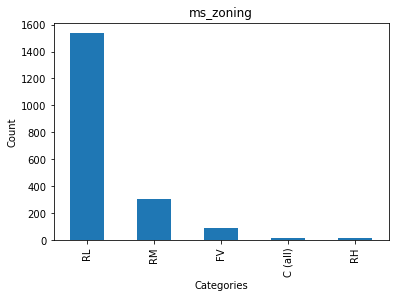

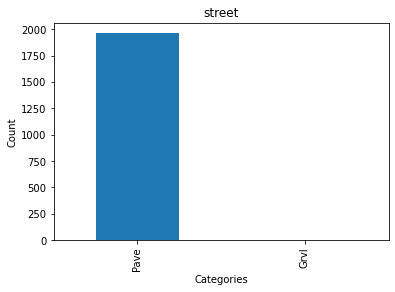

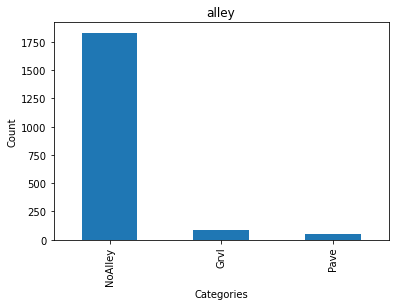

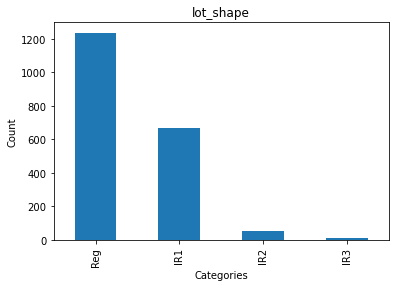

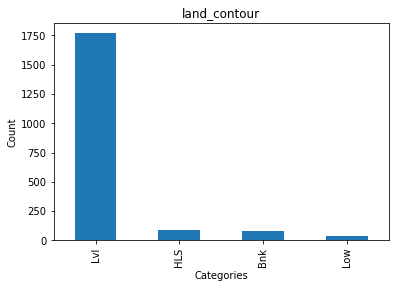

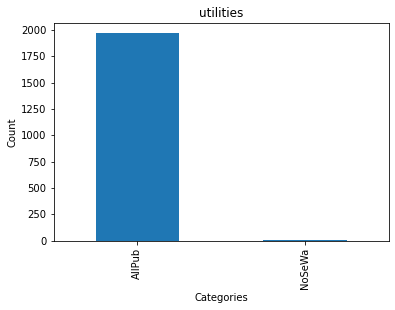

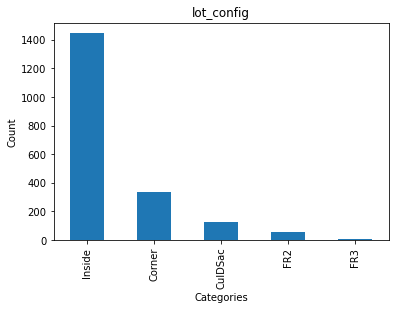

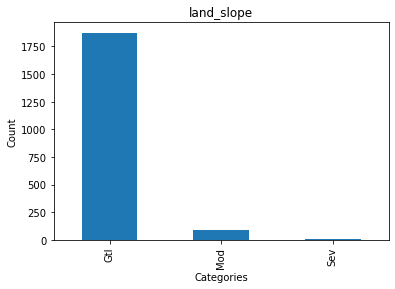

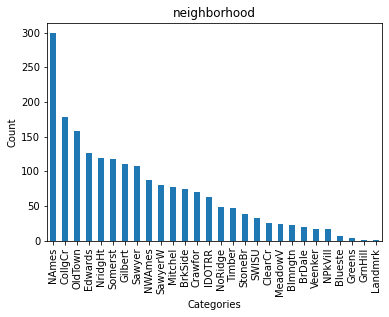

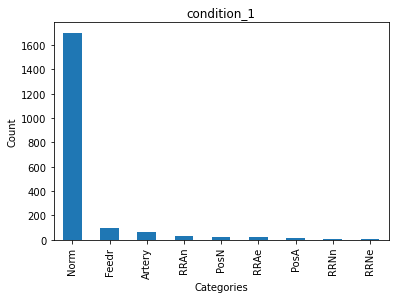

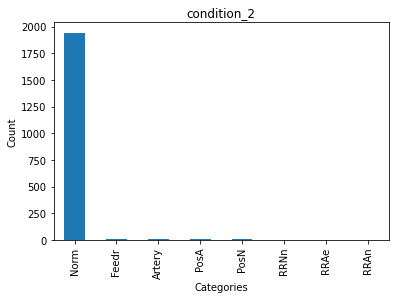

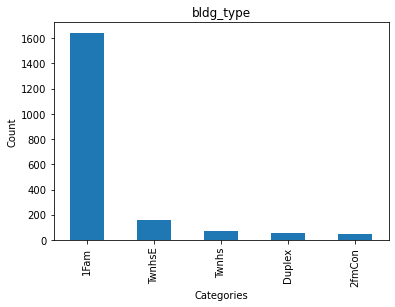

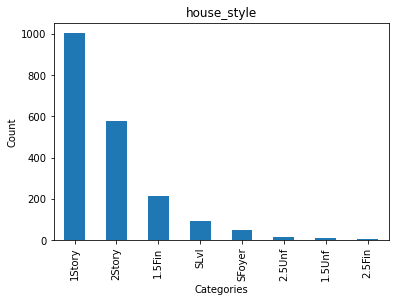

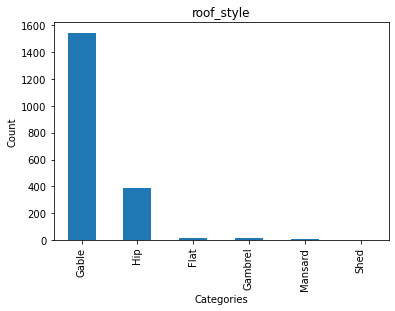

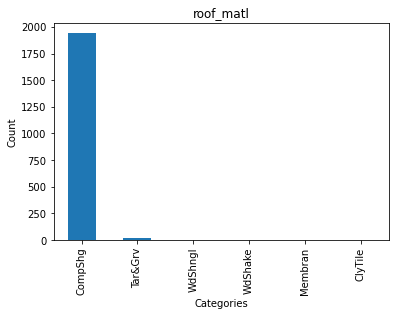

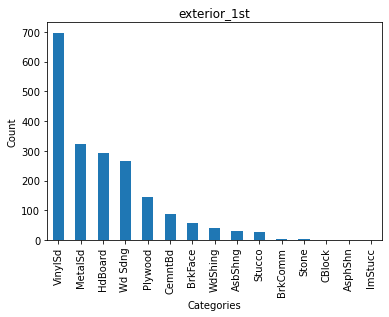

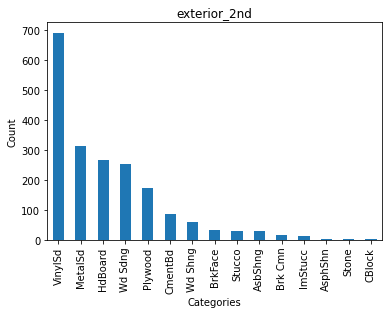

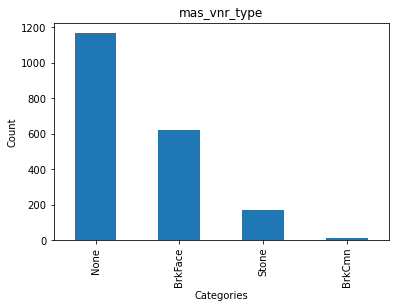

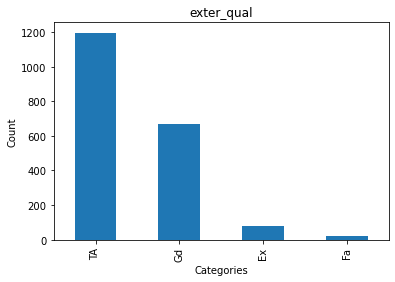

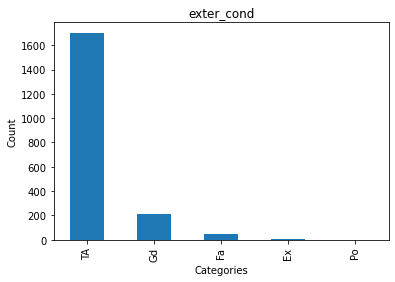

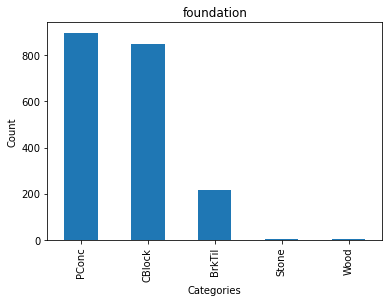

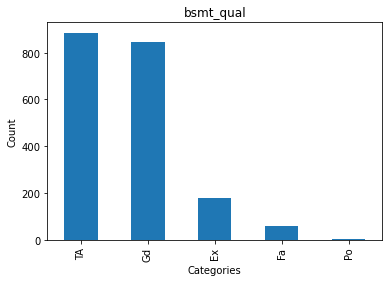

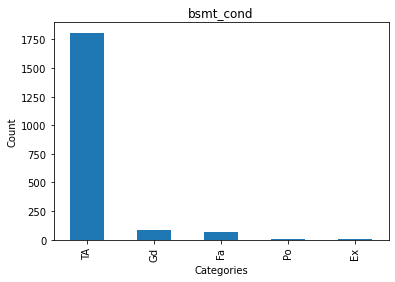

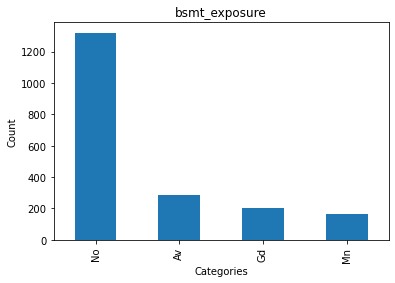

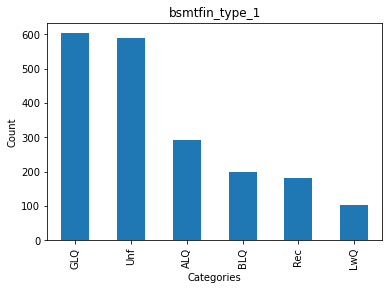

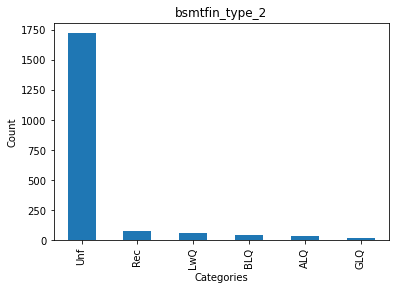

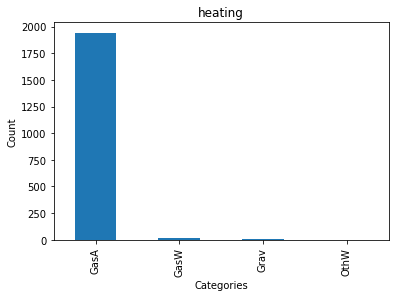

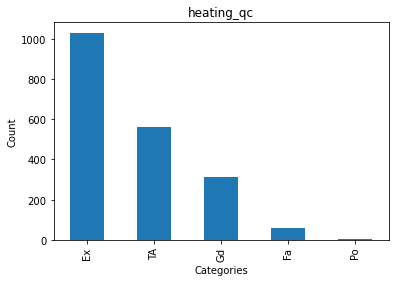

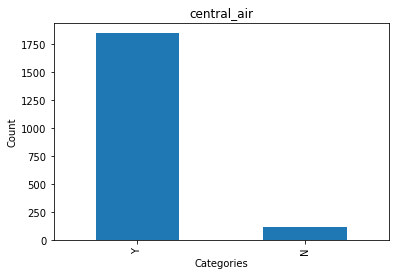

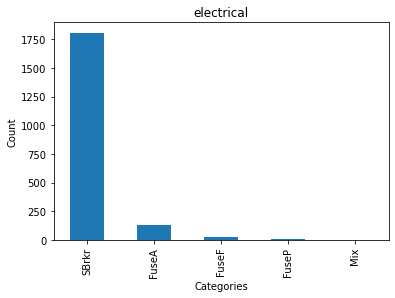

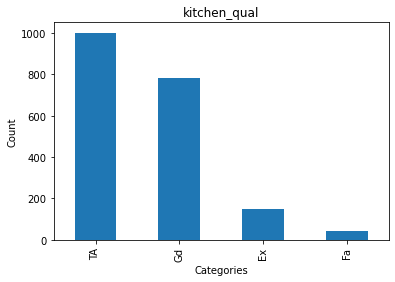

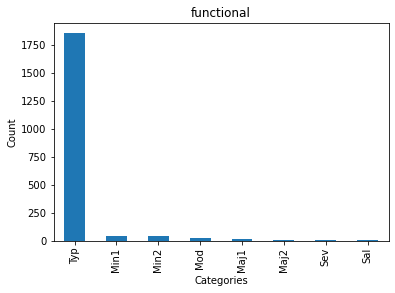

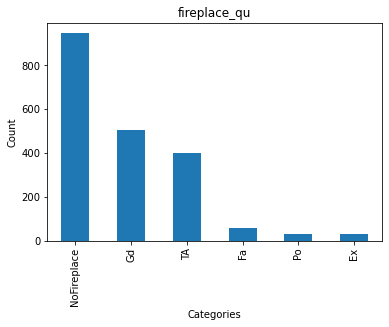

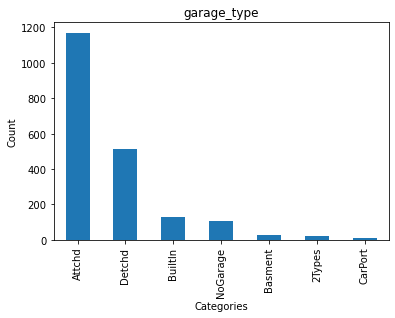

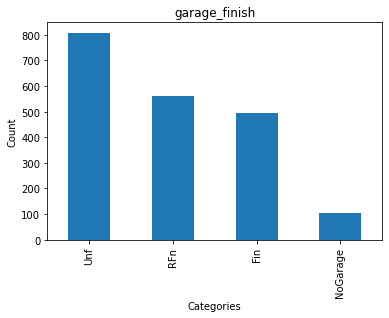

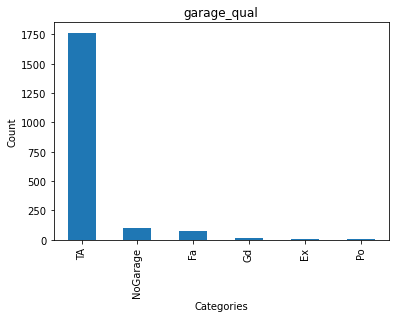

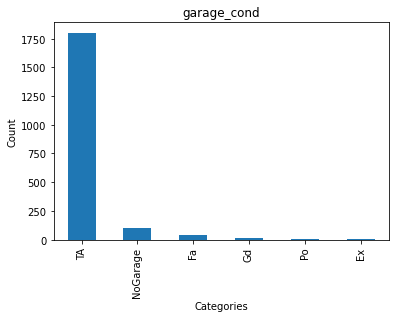

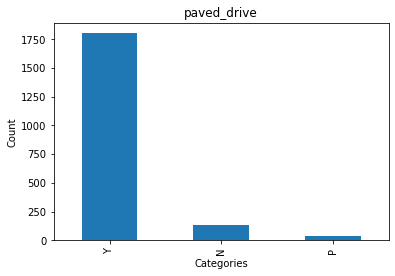

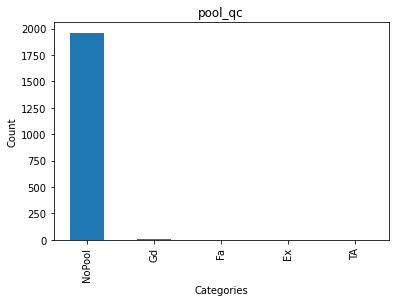

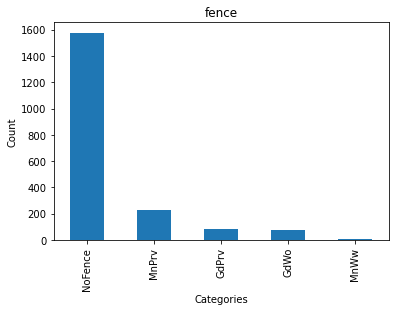

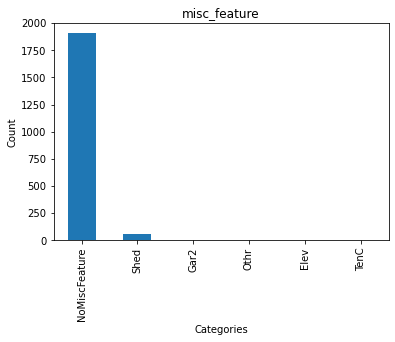

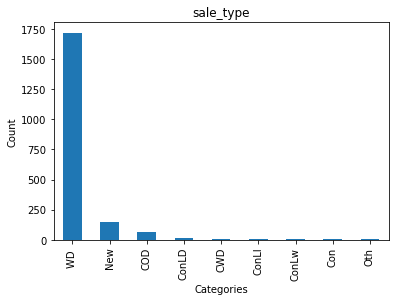

In [33]:
# Create bar plots for all categorical columns
for column in train:
    if pd.api.types.is_string_dtype(train[column]):
        plt.figure(column)
        plt.title(column)
        plt.xlabel('Categories')
        plt.ylabel('Count')
        train[column].value_counts().plot(kind = 'bar')

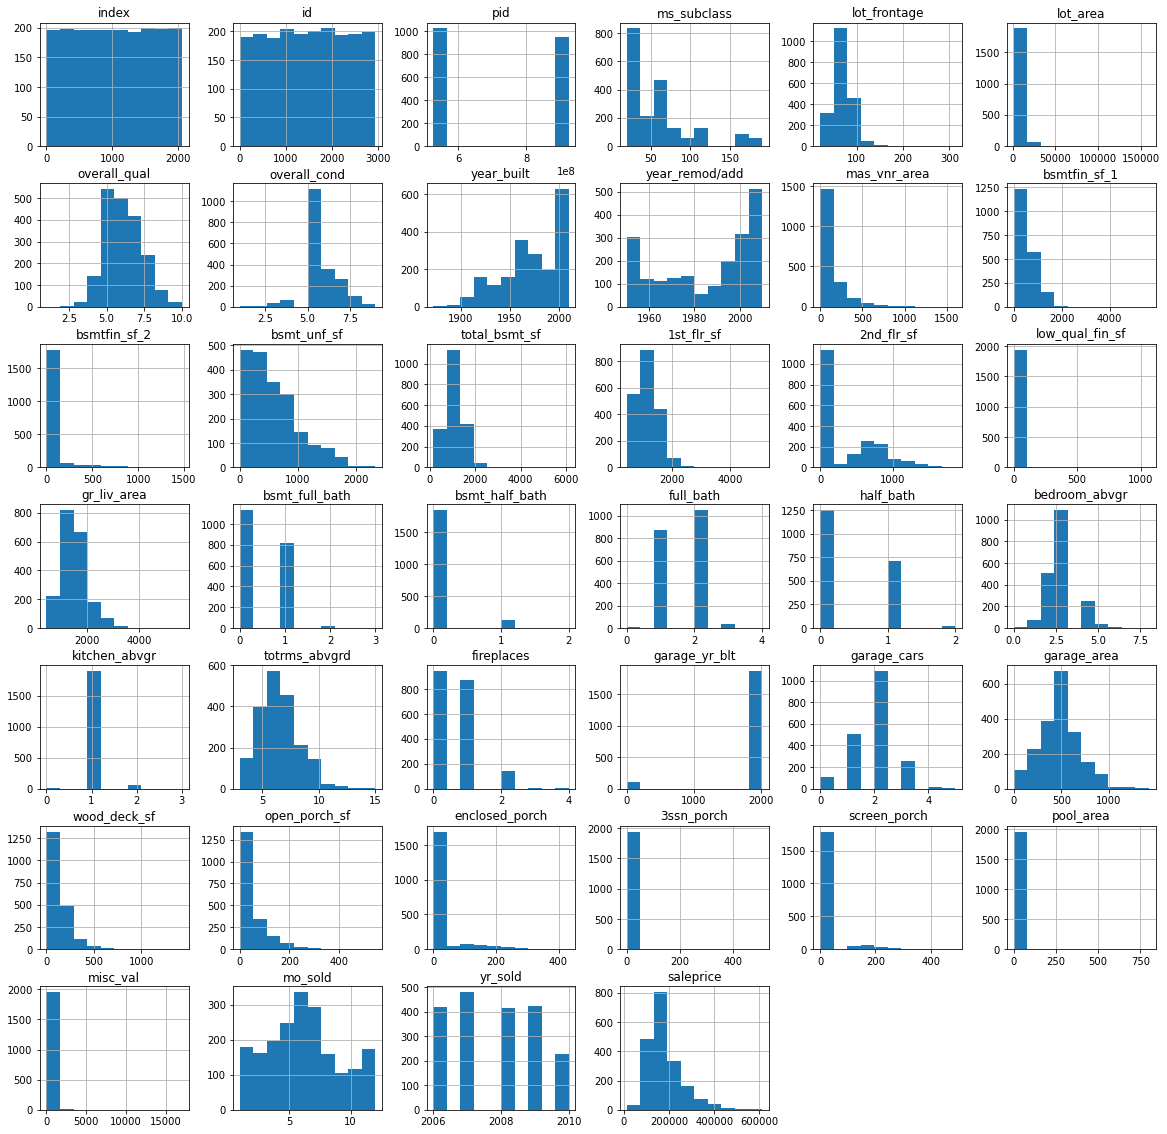

In [34]:
# Create histogram for all numerical columns
train.hist(figsize = (20, 20));

There are several features that doesn't seem to follow the normal distribution. We will analyse the ones that have  high correlation with `saleprice` slightly later.

**2. Mapping ordinal values to numeric representations.**

Ordinal attributes are categorical attributes with a sense of order amongst the values. We will map and transform the values in these columns based on the order.

In [35]:
# Create a copy of the dataset before making amendments
train_eda = train

# Mapping of the "lot_shape" column:
lotshape_ord_map = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
train_eda['lot_shape'] = train_eda['lot_shape'].map(lotshape_ord_map)

# Mapping of the "utilities" column:
utilities_ord_map = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}
train_eda['utilities'] = train_eda['utilities'].map(utilities_ord_map)

# Mapping of the "exter_qual" column:
exter_qual_ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
train_eda['exter_qual'] = train_eda['exter_qual'].map(exter_qual_ord_map)

# Mapping of the "exter_cond" column:
exter_cond_ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
train_eda['exter_cond'] = train_eda['exter_cond'].map(exter_cond_ord_map)

# Mapping of the "bsmt_qual" column:
bsmt_qual_ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_eda['bsmt_qual'] = train_eda['bsmt_qual'].map(bsmt_qual_ord_map)

# Mapping of the "bsmt_cond" column:
bsmt_cond_ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train_eda['bsmt_cond'] = train_eda['bsmt_cond'].map(bsmt_cond_ord_map)

# Mapping of the "bsmt_exposure" column:
bsmt_exposure_ord_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
train_eda['bsmt_exposure'] = train_eda['bsmt_exposure'].map(bsmt_exposure_ord_map)

# Mapping of the "bsmtfin_type_1" column:
bsmtfin_type_1_ord_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
train_eda['bsmtfin_type_1'] = train_eda['bsmtfin_type_1'].map(bsmtfin_type_1_ord_map)

# Mapping of the "bsmtfin_type_2" column:
bsmtfin_type_2_ord_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
train_eda['bsmtfin_type_2'] = train_eda['bsmtfin_type_2'].map(bsmtfin_type_2_ord_map)

# Mapping of the "heating_qc" column:
heating_qc_ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
train_eda['heating_qc'] = train_eda['heating_qc'].map(heating_qc_ord_map)

# Mapping of the "electrical" column:
electrical_ord_map = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1}
train_eda['electrical'] = train_eda['electrical'].map(electrical_ord_map)

# Mapping of the "kitchen_qual" column:
kitchen_qual_ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
train_eda['kitchen_qual'] = train_eda['kitchen_qual'].map(kitchen_qual_ord_map)

# Mapping of the "functional" column:
functional_ord_map = {'Typ': 8,'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
train_eda['functional'] = train_eda['functional'].map(functional_ord_map)

# Mapping of the "fireplace_qu" column:
fireplace_qu_ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoFireplace': 0}
train_eda['fireplace_qu'] = train_eda['fireplace_qu'].map(fireplace_qu_ord_map)

# Mapping of the "garage_finish" column:
garage_finish_ord_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NoGarage': 0}
train_eda['garage_finish'] = train_eda['garage_finish'].map(garage_finish_ord_map)

# Mapping of the "garage_qual" column:
garage_qual_ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGarage': 0}
train_eda['garage_qual'] = train_eda['garage_qual'].map(garage_qual_ord_map)

# Mapping of the "garage_cond" column:
garage_cond_ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGarage': 0}
train_eda['garage_cond'] = train_eda['garage_cond'].map(garage_cond_ord_map)

# Mapping of the "paved_drive" column:
paved_drive_ord_map = {'Y': 3, 'P': 2, 'N': 1}
train_eda['paved_drive'] = train_eda['paved_drive'].map(paved_drive_ord_map)

# Mapping of the "pool_qc" column:
pool_qc_ord_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NoPool': 0}
train_eda['pool_qc'] = train_eda['pool_qc'].map(pool_qc_ord_map)

# Mapping of the "fence" column:
fence_ord_map = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NoFence': 0}
train_eda['fence'] = train_eda['fence'].map(fence_ord_map)

In [36]:
# Check the data type of the convereted columns
ord_columns = ['lot_shape', 'utilities', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']
print(train_eda[ord_columns].dtypes)

lot_shape         int64
utilities         int64
exter_qual        int64
exter_cond        int64
bsmt_qual         int64
bsmt_cond         int64
bsmt_exposure     int64
bsmtfin_type_1    int64
bsmtfin_type_2    int64
heating_qc        int64
electrical        int64
kitchen_qual      int64
functional        int64
fireplace_qu      int64
garage_finish     int64
garage_qual       int64
garage_cond       int64
paved_drive       int64
pool_qc           int64
fence             int64
dtype: object


**3. Check for features with high correlation.**

One of the assumption of linear regression is that there should not be any collinearity among independent features. Thus we will identify features with high correlation (> 70%) and will determine if we should drop them for the purpose of the analysis.

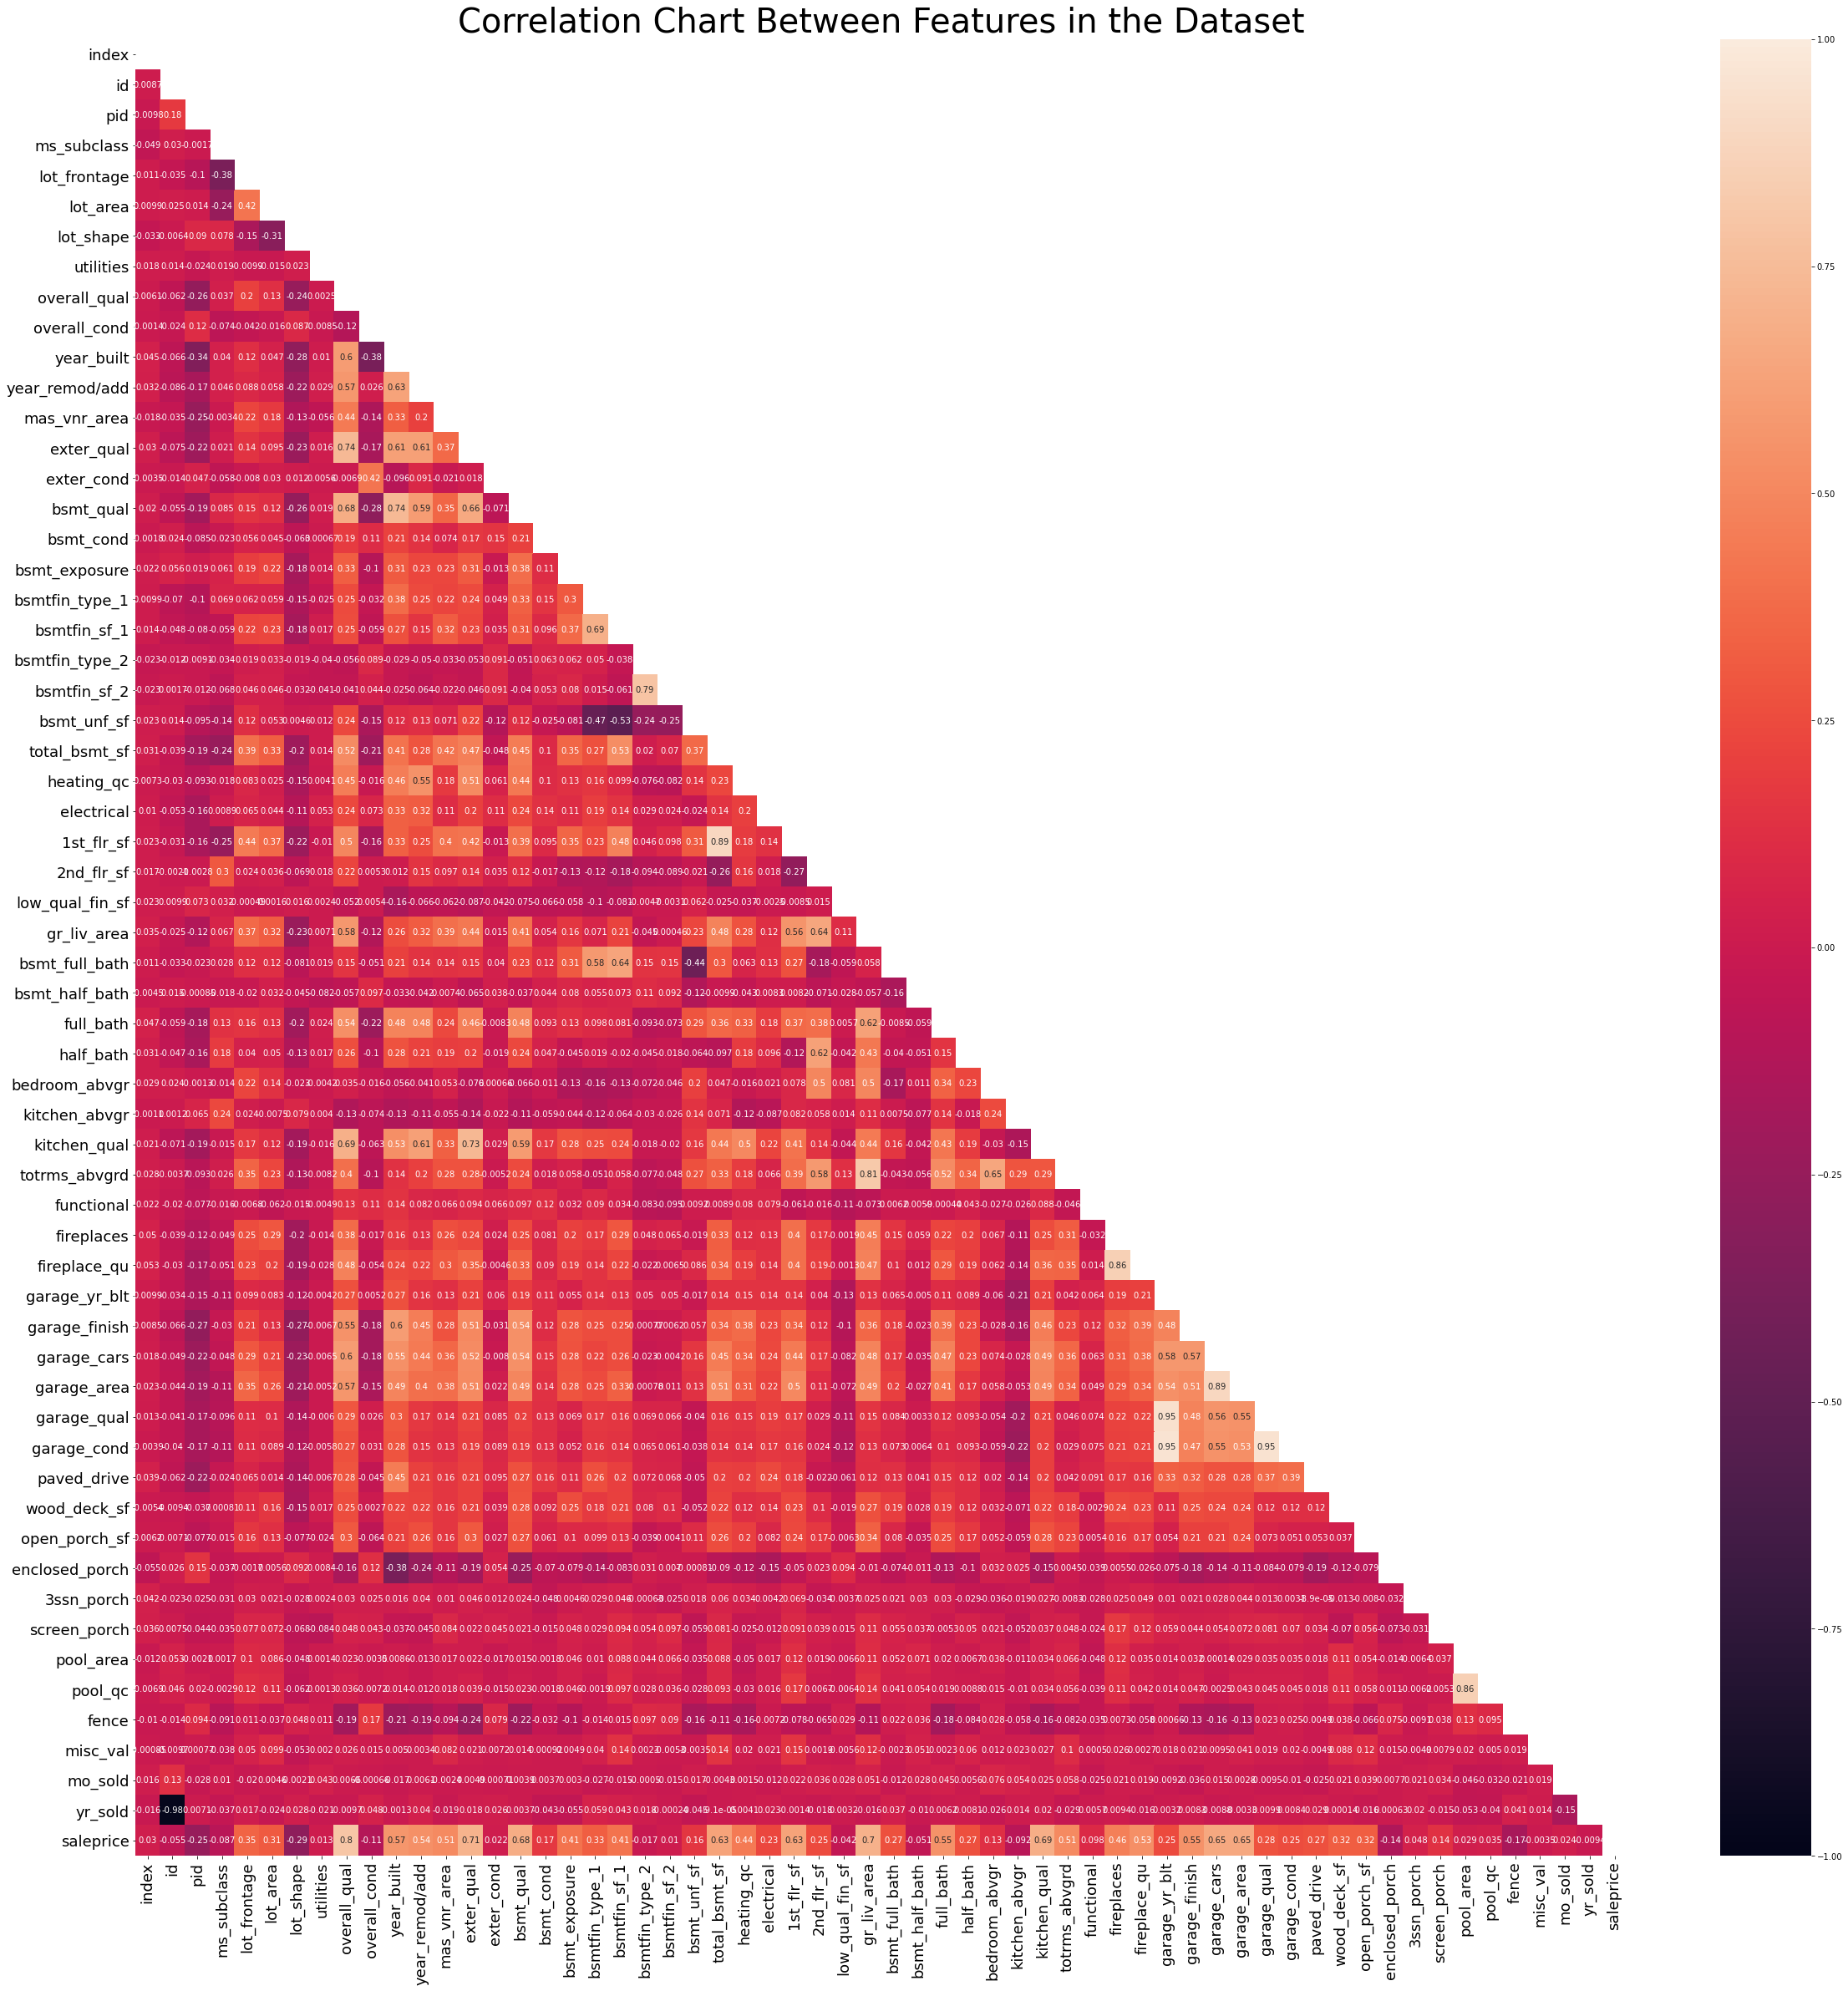

In [37]:
# Create a mask to hide the upper portion of the heatmap
mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True

# Plot a heatmap for features correlation
plt.figure(figsize = (40, 40))
sns.heatmap(train_eda.corr(), annot = True, mask = mask, vmin = 1, vmax = -1)
plt.title('Correlation Chart Between Features in the Dataset', fontsize = 40)
plt.tick_params(labelsize = 18)

From the heatmap above, we can see that some of the features are highly correlated. We will identify the features that have a correlation of more than 0.7 and drop the feature that have a relatively lower correlation to `saleprice`.

In [38]:
# Define function to check the correlation between 2 features and the correlation of these features against sales price
def check_corr(feature1,feature2):
    print(f"{feature1} vs {feature2}: {train_eda[feature1].corr(train_eda[feature2])}")
    print(f"{feature1} vs saleprice: {train_eda[feature1].corr(train_eda['saleprice'])}")
    print(f"{feature2} vs saleprice: {train_eda[feature2].corr(train_eda['saleprice'])}")

# Check correlation between 'id' vs 'yr_sold' and the correlation of these features against salesprice
check_corr('id', 'yr_sold')

id vs yr_sold: -0.975625199796337
id vs saleprice: -0.05548489241483109
yr_sold vs saleprice: -0.009412368526755116


The correlation between `id` and `yr_sold` is 0.98 and it is higher than the threshold of 0.70. Thus we will drop one of the columns from the dataset. Since `id` has a relatively higher correlation to `salesprice` as compared to `yr_sold`, we will drop `yr_sold` from the dataset.

In [39]:
# Check correlation between 'bsmtfin_sf_2' vs 'bsmtfin_type_2' and the correlation of these features against salesprice
check_corr('bsmtfin_sf_2', 'bsmtfin_type_2')

bsmtfin_sf_2 vs bsmtfin_type_2: 0.7915646370424235
bsmtfin_sf_2 vs saleprice: 0.010423749910623064
bsmtfin_type_2 vs saleprice: -0.016962632584027276


The correlation between `bsmtfin_sf_2` and `bsmtfin_type_2` is 0.79 and it is higher than the threshold of 0.70. Thus we will drop one of the columns from the dataset. Since `bsmtfin_sf_2` has a relatively higher correlation to `salesprice` as compared to `bsmtfin_type_2`, we will drop `bsmtfin_sf_2` from the dataset.

In [40]:
# Check correlation between '1st_flr_sf' vs 'total_bsmt_sf' and the correlation of these features against salesprice
check_corr('1st_flr_sf', 'total_bsmt_sf')

1st_flr_sf vs total_bsmt_sf: 0.8937245104310099
1st_flr_sf vs saleprice: 0.6300523367907344
total_bsmt_sf vs saleprice: 0.6292668074751586


The correlation between `1st_flr_sf` and `total_bsmt_sf` is 0.89 and it is higher than the threshold of 0.70. Thus we will drop one of the columns from the dataset. Since `1st_flr_sf` has a relatively higher correlation to `salesprice` as compared to `total_bsmt_sf`, we will drop `total_bsmt_sf` from the dataset.

In [41]:
# Check correlation between 'exter_qual' vs 'overall_qual' and the correlation of these features against salesprice
check_corr('exter_qual', 'overall_qual')

exter_qual vs overall_qual: 0.7400636128248601
exter_qual vs saleprice: 0.7071841877405788
overall_qual vs saleprice: 0.797646487856644


The correlation between `exter_qual` and `overall_qual` is 0.74 and it is higher than the threshold of 0.70. Thus we will drop one of the columns from the dataset. Since `overall_qual` has a relatively higher correlation to `salesprice` as compared to `exter_qual`, we will drop `exter_qual` from the dataset.

In [42]:
# Check correlation between 'totrms_abvgrd' vs 'gr_liv_area' and the correlation of these features against salesprice
check_corr('totrms_abvgrd', 'gr_liv_area')

totrms_abvgrd vs gr_liv_area: 0.8141244772178916
totrms_abvgrd vs saleprice: 0.5135300788446885
gr_liv_area vs saleprice: 0.7009192522037576


The correlation between `totrms_abvgrd` and `gr_liv_area` is 0.81 and it is higher than the threshold of 0.70. Thus we will drop one of the columns from the dataset. Since `gr_liv_area` has a relatively higher correlation to `salesprice` as compared to `totrms_abvgrd`, we will drop `totrms_abvgrd` from the dataset.

In [43]:
# Check correlation between 'kitchen_qual' vs 'overall_qual' and the correlation of these features against salesprice
check_corr('kitchen_qual', 'overall_qual')

kitchen_qual vs overall_qual: 0.6901261172652196
kitchen_qual vs saleprice: 0.6864092632108635
overall_qual vs saleprice: 0.797646487856644


The correlation between `kitchen_qual` and `overall_qual` is 0.69 and it is close to the threshold of 0.70. Thus we will drop one of the columns from the dataset. Since `overall_qual` has a relatively higher correlation to `salesprice` as compared to `kitchen_qual`, we will drop `kitchen_qual` from the dataset.

In [44]:
# Check correlation between 'bsmtfin_sf_1' vs 'bsmtfin_type_1' and the correlation of these features against salesprice
check_corr('bsmtfin_sf_1', 'bsmtfin_type_1')

bsmtfin_sf_1 vs bsmtfin_type_1: 0.6884223662599764
bsmtfin_sf_1 vs saleprice: 0.41096914133364665
bsmtfin_type_1 vs saleprice: 0.3267044971823063


The correlation between `bsmtfin_sf_1` and `bsmtfin_type_1` is 0.69 and it is close to the threshold of 0.70. Thus we will drop one of the columns from the dataset. Since `bsmtfin_type_1` has a relatively higher correlation to `salesprice` as compared to `bsmtfin_sf_1`, we will drop `bsmtfin_sf_1` from the dataset.

In [45]:
# Check correlation between 'fireplace_qu' vs 'fireplaces' and the correlation of these features against salesprice
check_corr('fireplace_qu', 'fireplaces')

fireplace_qu vs fireplaces: 0.8578679539527391
fireplace_qu vs saleprice: 0.5326126827364734
fireplaces vs saleprice: 0.4635731602019567


The correlation between `fireplace_qu` and `fireplaces` is 0.86 and it is higher than the threshold of 0.70. Thus we will drop one of the columns from the dataset. Since `fireplaces` has a relatively higher correlation to `salesprice` as compared to `fireplace_qu`, we will drop `fireplace_qu` from the dataset.

In [46]:
# Check correlation between 'garage_area' vs 'garage_cars' and the correlation of these features against salesprice
check_corr('garage_area', 'garage_cars')

garage_area vs garage_cars: 0.8917202833800499
garage_area vs saleprice: 0.6510163864449849
garage_cars vs saleprice: 0.6514969308668951


The correlation between `garage_area` and `garage_cars` is 0.89 and it is higher than the threshold of 0.70. Thus we will drop one of the columns from the dataset. Since `garage_cars` has a relatively higher correlation to `salesprice` as compared to `garage_area`, we will drop `garage_area` from the dataset.

In [47]:
# Check correlation between 'garage_cond' vs 'garage_qual' and the correlation of these features against salesprice
check_corr('garage_cond', 'garage_qual')

garage_cond vs garage_qual: 0.9503315079737672
garage_cond vs saleprice: 0.2538573786428568
garage_qual vs saleprice: 0.27669314513547005


The correlation between `garage_cond` and `garage_qual` is 0.95 and it is higher than the threshold of 0.70. Thus we will drop one of the columns from the dataset. Since `garage_qual` has a relatively higher correlation to `garage_cond` as compared to `yr_sold`, we will drop `garage_cond` from the dataset.

In [48]:
# Check correlation between 'pool_qc' vs 'pool_area' and the correlation of these features against salesprice
check_corr('pool_qc', 'pool_area')

pool_qc vs pool_area: 0.8585643106874808
pool_qc vs saleprice: 0.0351974703121154
pool_area vs saleprice: 0.029059095812791636


The correlation between `pool_qc` and `pool_area` is 0.86 and it is higher than the threshold of 0.70. Thus we will drop one of the columns from the dataset. Since `pool_qc` has a relatively higher correlation to `salesprice` as compared to `pool_area`, we will drop `pool_area` from the dataset.

In [49]:
# Check correlation between 'bsmt_qual' vs 'year_built' and the correlation of these features against salesprice
check_corr('bsmt_qual', 'year_built')

bsmt_qual vs year_built: 0.7378562753762268
bsmt_qual vs saleprice: 0.6767405849329484
year_built vs saleprice: 0.5677850057705219


The correlation between `bsmt_qual` and `year_built` is 0.74 and it is higher than the threshold of 0.70. Thus we will drop one of the columns from the dataset. Since `bsmt_qual` has a relatively higher correlation to `salesprice` as compared to `year_built`, we will drop `year_built` from the dataset.

In [50]:
# Drop the columns mentioned above
train_eda = train_eda.drop(columns = ['yr_sold', 'bsmtfin_sf_2', 'total_bsmt_sf', 'exter_qual', 'totrms_abvgrd', 'kitchen_qual', 'bsmtfin_type_1', 'fireplaces', 'garage_area', 'garage_cond', 'pool_area', 'year_built'], axis = 1)

Lets look at the revised heatmaps after dropping the correlated columns.

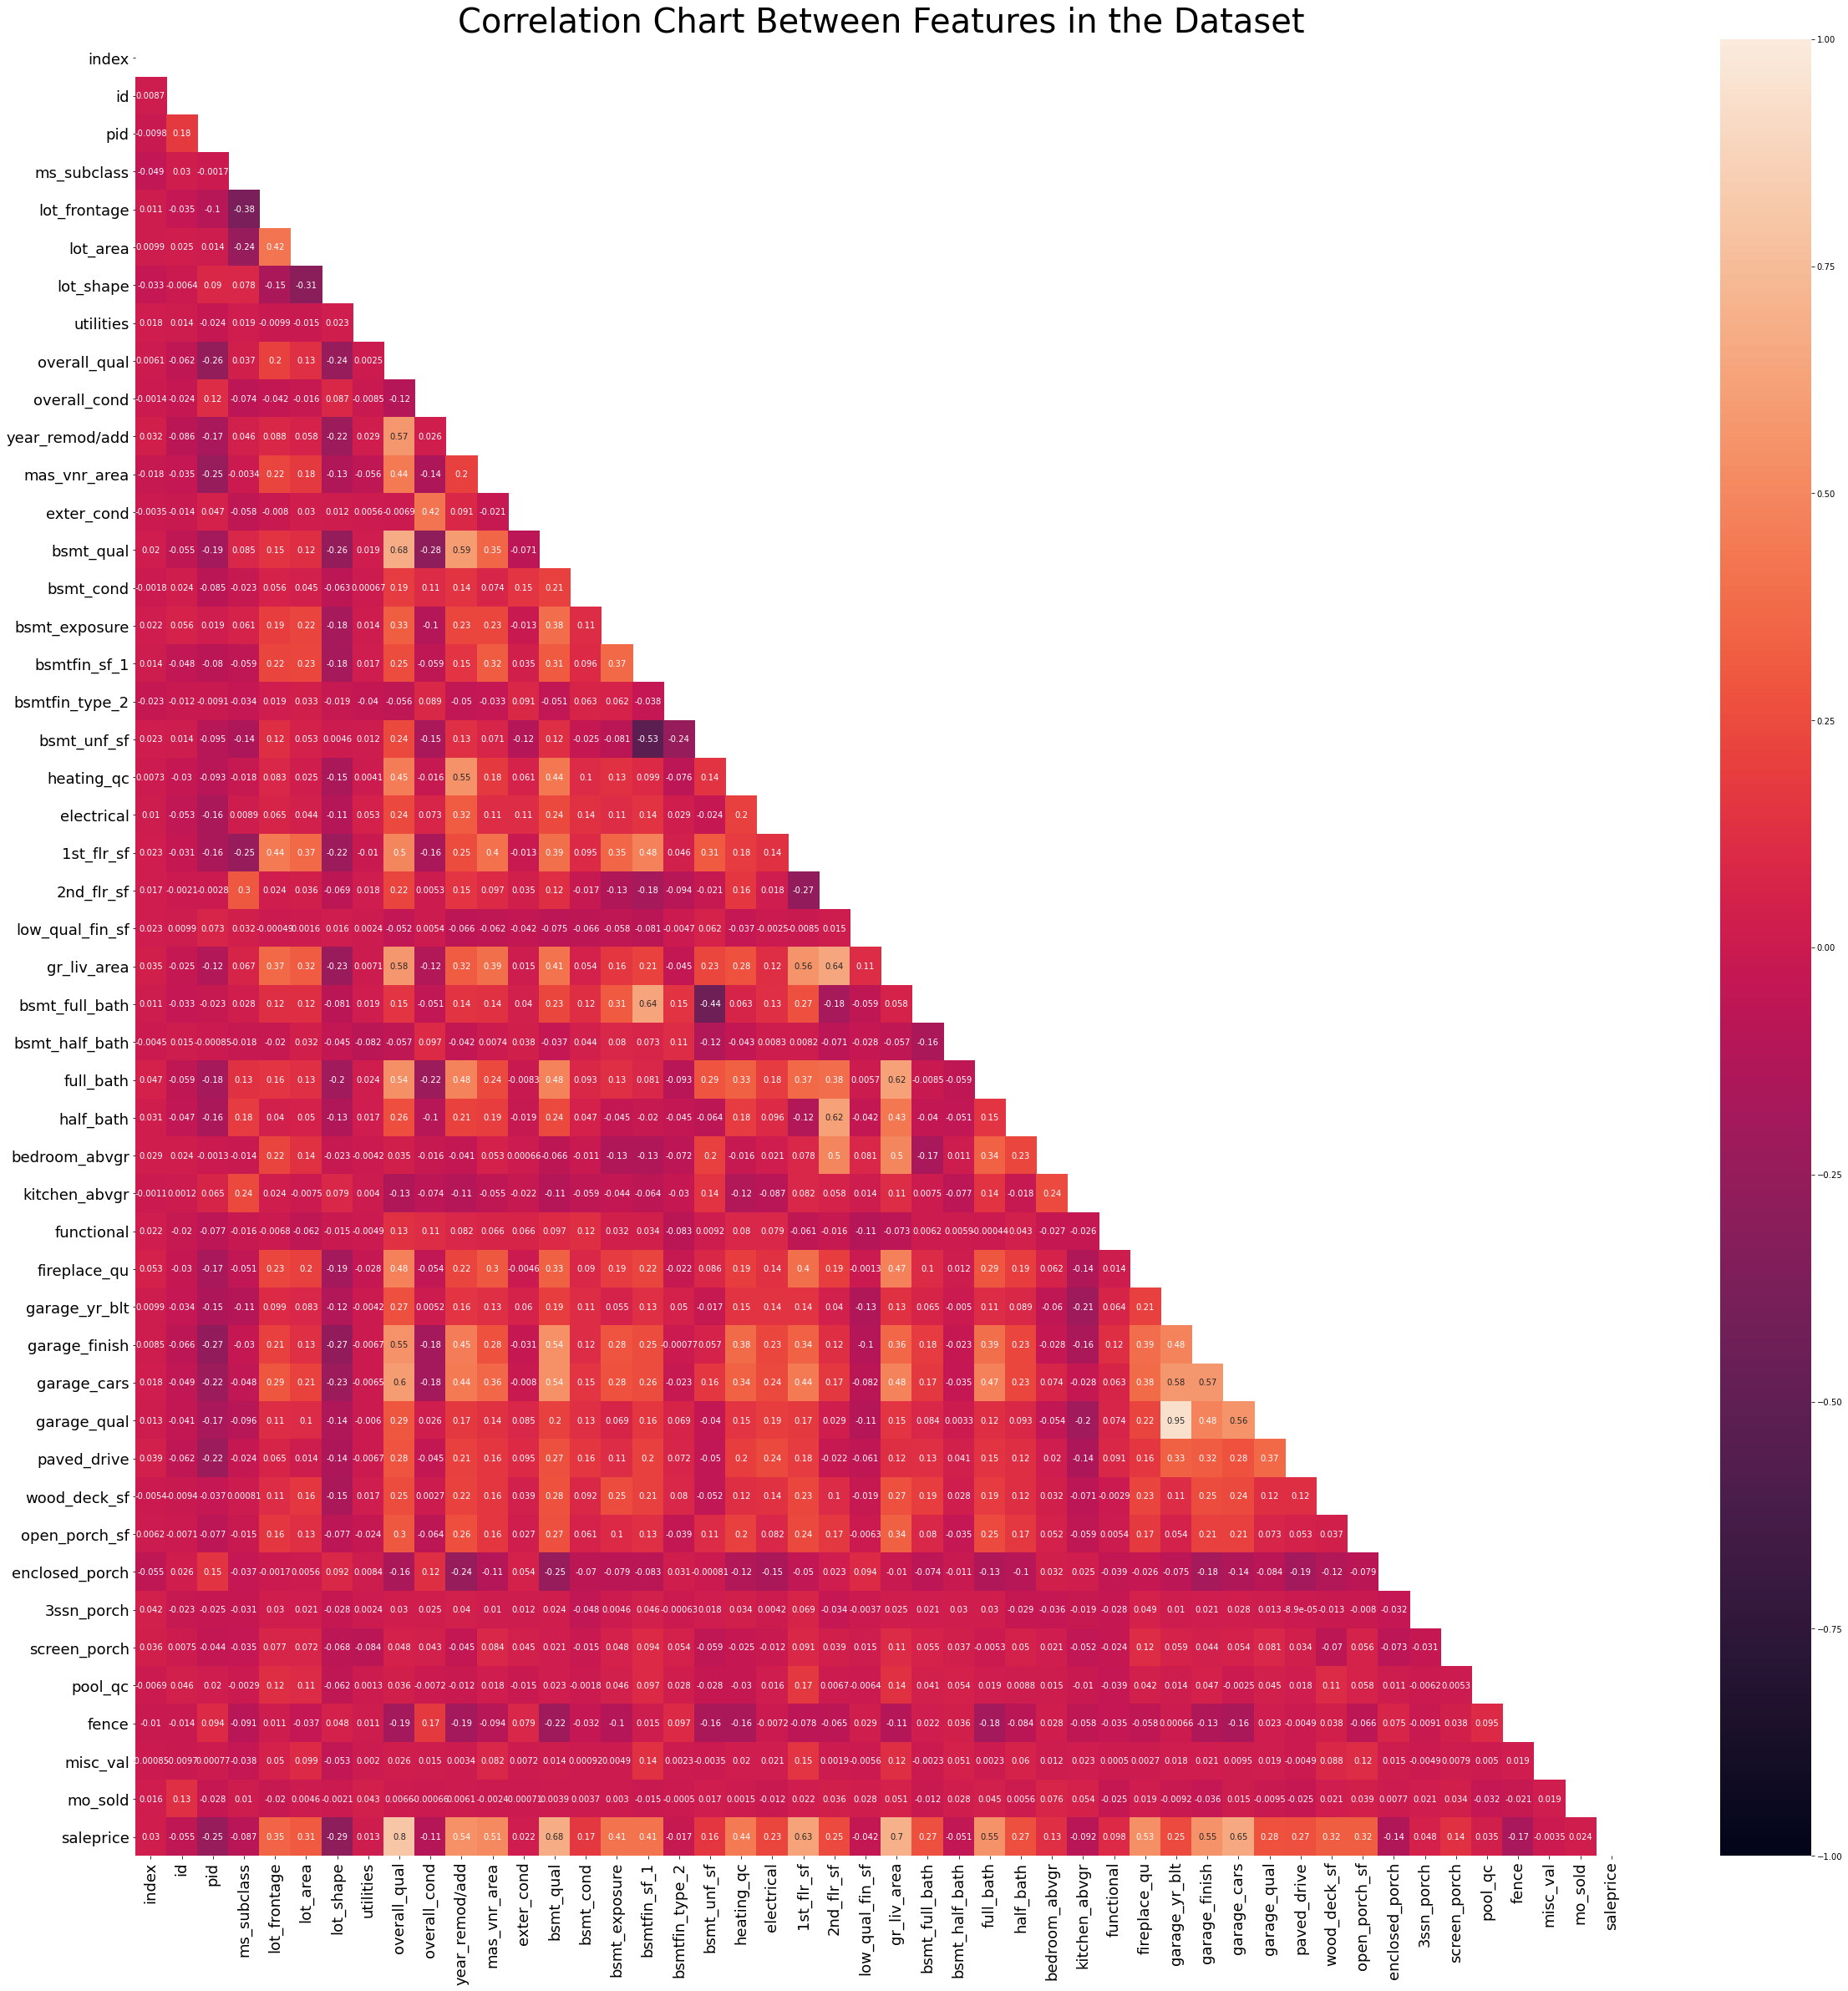

In [51]:
# Create a mask to hide the upper portion of the heatmap
mask = np.zeros_like(train_eda.corr())
mask[np.triu_indices_from(mask)] = True

# Plot a heatmap for features correlation
plt.figure(figsize = (40, 40))
sns.heatmap(train_eda.corr(), annot = True, mask = mask, vmin = -1, vmax = 1)
plt.title('Correlation Chart Between Features in the Dataset', fontsize = 40)
plt.tick_params(labelsize = 18)

Looks like there isn't any more features that are above the threshold of 0.7.

**4. Transforms nominal attributes to numeric representations.**

Transforms categorical attributes into binary features for modelling purposes.

In [52]:
# Create a list for all the columns with string data type
nominal_category = []

for column in train:
   if pd.api.types.is_string_dtype(train[column]):
        nominal_category.append(column)

# Binarize the categorical columns
train_eda = pd.get_dummies(train_eda, columns = nominal_category)

display(train_eda.head())

,index,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,overall_qual,overall_cond,year_remod/add,mas_vnr_area,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,functional,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_qual,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_qc,fence,misc_val,mo_sold,saleprice,ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,alley_Grvl,alley_NoAlley,alley_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Gtl,land_slope_Mod,land_slope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NoGarage,misc_feature_Elev,misc_feature_Gar2,misc_feature_NoMiscFeature,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,109,533352170,60,73,13517,3,4,6,8,2005,289,3,3,3,1,533,1,192,5,5,725,754,0,1479,0,0,2,1,3,1,8,0,1976,2,2,3,3,0,44,0,0,0,0,0,0,3,130500,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,544,531379050,60,43,11492,3,4,7,5,1997,132,3,4,3,1,637,1,276,5,5,913,1209,0,2122,1,0,2,1,4,1

## Initial Modelling

**1. Constructing a baseline model**

Constructed a baseline model to use for model comparisons.

In [53]:
# for each column, load in only if it is numeric and not 'saleprice'
features = [col for col in train_eda._get_numeric_data().columns if col != 'saleprice']
X = train_eda[features]
y = train_eda['saleprice']

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
# Constructing a baseline model by using dummy regressor to predict using mean
dr = DummyRegressor()
print(f'Baseline model R2 score: {cross_val_score(dr, X_train, y_train).mean()}')

Baseline model R2 score: -0.004882914777806224


**2. Constructing the initial model:**

In [55]:
# Defining a function to run linear regression for values X and y
def lin_reg(X,y):
    # Train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # Instantiate/fit the model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # Derive the cross valuation score
    lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
    print(f'Linear Regression R2 scores: {lr_scores}')
    print(f'Linear Regression mean R2 score: {lr_scores.mean()}')

lin_reg(X,y)

Linear Regression R2 scores: [0.51307869 0.82466892 0.83265036 0.8077789  0.90506882]
Linear Regression mean R2 score: 0.7766491393298098


The inital model yields a mean $R^2$ cross validation score of 0.77 which is relatively high. However, our goal is to acheive a score of 0.80. We will see what we can do to improve the model. We will first start with the top 5 features that are directly correlated with saleprice.

## Further EDA and Feature Engineering

**1. Investigating the top 5 features correlated with `saleprice`.**

In [56]:
# Identify top 5 features correalated with 'saleprice'
print(train_eda.corr()['saleprice'].sort_values(ascending = False)[1:6].to_string())

overall_qual    0.797646
gr_liv_area     0.700919
bsmt_qual       0.676741
garage_cars     0.651497
1st_flr_sf      0.630052


We will look at `overall_qual`, `gr_liv_area`, `bsmt_qual`, `garage_cars` and `1st_flr_sf` below.

**1.1. Sale Price**

Before we look at the variables that are highly correlated with Sale Price, we will look at Sale Price itself.

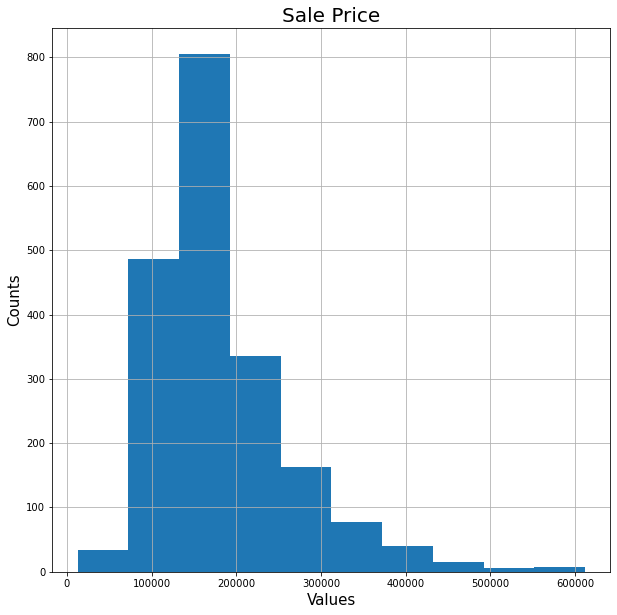

In [57]:
# Plot histogram of 'sale_price'
train_eda['saleprice'].hist(figsize = (10, 10))
plt.title('Sale Price', fontsize = 20)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tick_params(labelsize = 10);

Sales Price seems to be slightly skewed to the right and follows a power law distribution. Since linear regression assumes normality, we shall apply logarithmic transformation to `saleprice` to normalise it.

In [58]:
# log_transformation for 'gr_liv_area'
train_eda['log_saleprice'] = np.log2(train_eda['saleprice']+1)

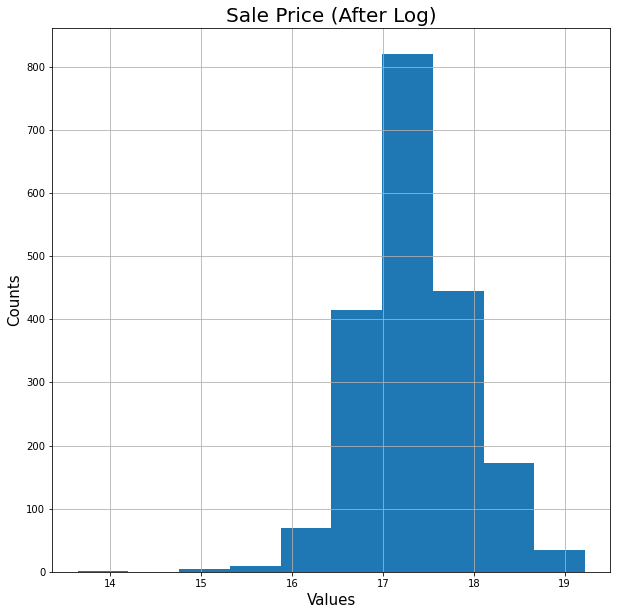

In [59]:
# Plot histogram of 'sale_price'
train_eda['log_saleprice'].hist(figsize = (10, 10))
plt.title('Sale Price (After Log)', fontsize = 20)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tick_params(labelsize = 10);

In [60]:
# Get revised R2 score after applying log transformation
features = [col for col in train_eda._get_numeric_data().columns if col != 'saleprice' and col != 'log_saleprice']
X = train_eda[features]
y = train_eda['log_saleprice']

lin_reg(X,y)

Linear Regression R2 scores: [0.6327418  0.86900033 0.90138776 0.81429497 0.91039139]
Linear Regression mean R2 score: 0.8255632512008161


After applying logarithmic transformation to `saleprice`, the distribution looks normal now. We have also managed to improve the mean $R^2$ cross validation error from 0.77665 to 0.82556.

**1.2. Overall quality**

Feature pertains to overall material and finish quality of the house.

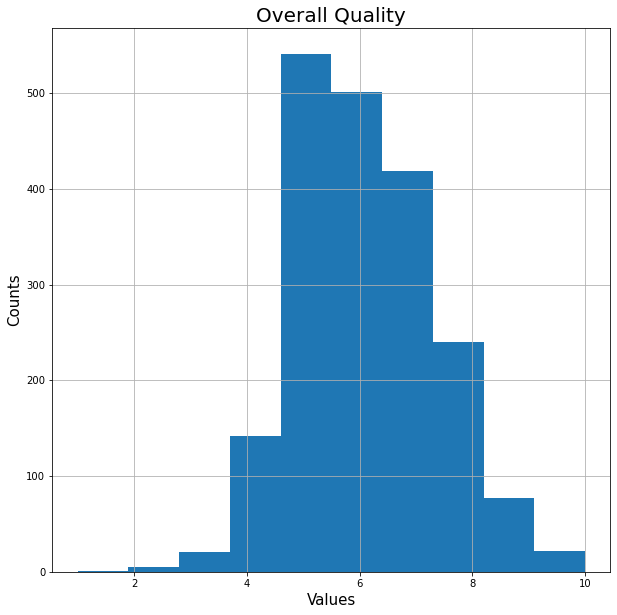

In [61]:
# Plot histogram of 'overall_qual'
train_eda['overall_qual'].hist(figsize = (10, 10))
plt.title('Overall Quality', fontsize = 20)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tick_params(labelsize = 10);

Distribution of Overall Quality resembles a normal distribution. Hence, there is no need to perform log transformation on `overall_qual`.

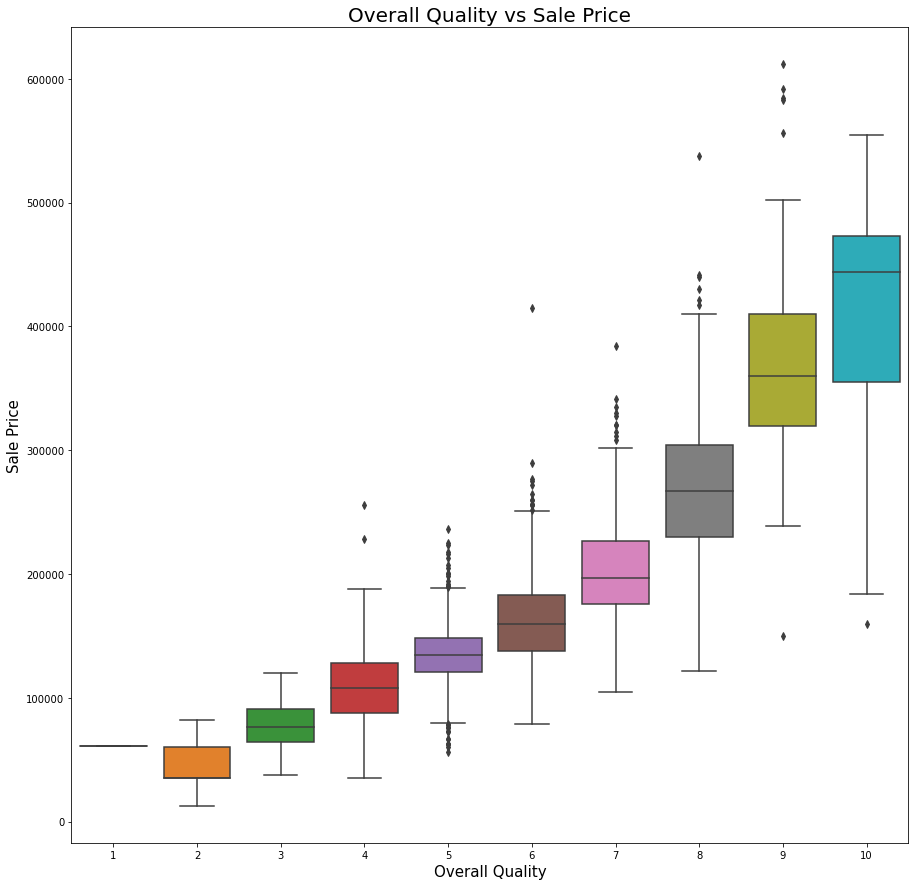

In [62]:
# Plot a box plot to compare Overall Quality vs Sale Price
plt.figure(figsize = (15,15))
sns.boxplot(x = train_eda['overall_qual'], y = train_eda['saleprice'], data = train_eda)
plt.title('Overall Quality vs Sale Price', fontsize = 20)
plt.xlabel('Overall Quality', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
plt.tick_params(labelsize = 10);

Sale price increases with overall quality as expected. Usually houses with better overall quality are likely to command a higher sale price. The interquartile range is significantly higher for houses with Overall Quality rating of 8 (Very Good), 9 (Excellent) and 10 (Very Excellent).

**1.3. Above ground living area in square feet**

Feature pertains to above ground living area in square feet.

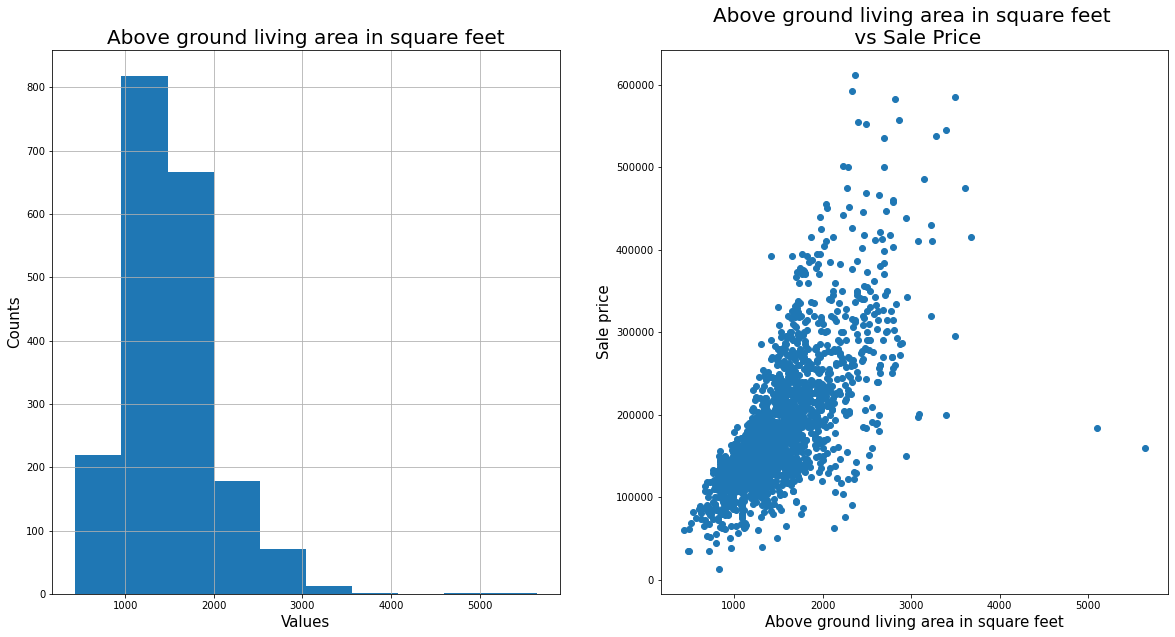

In [63]:
# Plot histogram of 'gr_liv_area'
plt.subplot(1, 2, 1) # row 1, col 2 index 1
train_eda['gr_liv_area'].hist(figsize = (20, 10))
plt.title('Above ground living area in square feet', fontsize = 20)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tick_params(labelsize = 10);

# Plot scatterplot of 'gr_liv_area'# Plot histogram of 'gr_liv_area'
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(train_eda['gr_liv_area'], train_eda['saleprice'])
plt.title('Above ground living area in square feet \n vs Sale Price', fontsize = 20)
plt.xlabel('Above ground living area in square feet', fontsize = 15)
plt.ylabel('Sale price', fontsize = 15)
plt.tick_params(labelsize = 10);

Above Grade Living Area Square Feet seems to be slightly skewed to the right and follows a power law distribution. Since linear regression assumes normality, we shall apply logarithmic transformation to `gr_liv_area` to normalise it.

In [64]:
# log_transformation for 'gr_liv_area'
train_eda['log_gr_liv_area'] = np.log2(train_eda['gr_liv_area']+1)

There also seem to be 2 outliers that could be found on the right side scatterplot. They pertain houses with 'Above grade living area" of more than 5,000 square feet but only has sale prices of less than $20,000. This seems perculiar as most of the houses usually have "Above grade living area" of less than 4,000 feet. It is also very unlikely that such houses will have such low selling prices as well. Thus we will assume that they are entry errors and we will identify and drop them from the dataset.

In [65]:
# Filter dataset for the outliers
display(train_eda[train_eda['gr_liv_area'] >= 5000])

,index,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,overall_qual,overall_cond,year_remod/add,mas_vnr_area,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,functional,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_qual,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_qc,fence,misc_val,mo_sold,saleprice,ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,alley_Grvl,alley_NoAlley,alley_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Gtl,land_slope_Mod,land_slope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NoGarage,misc_feature_Elev,misc_feature_Gar2,misc_feature_NoMiscFeature,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,log_saleprice,log_gr_liv_area
921,960,1499,908154235,60,313,63887,1,4,10,5,2008,796,3,5,3,4,5644,1,466,5,5,4692,950,0,5642,2,0,2,1,3,1,8,4,2008,3,2,3,3,214,292,0,0,0,3,0,0,1,160000,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,17.287721,12.462247
1808,1885,2181,908154195,20,128,39

In [66]:
# Drop row 921 and 1808 from the "train" dataset
train_eda.drop(index = 921, axis = 0, inplace = True)
train_eda.drop(index = 1808, axis = 0, inplace = True)

# Display data after deleting row 921 and 1808
display(train_eda.iloc[920:922])
display(train_eda.iloc[1807:1809])

,index,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,overall_qual,overall_cond,year_remod/add,mas_vnr_area,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,functional,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_qual,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_qc,fence,misc_val,mo_sold,saleprice,ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,alley_Grvl,alley_NoAlley,alley_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Gtl,land_slope_Mod,land_slope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NoGarage,misc_feature_Elev,misc_feature_Gar2,misc_feature_NoMiscFeature,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,log_saleprice,log_gr_liv_area
920,959,281,908203100,20,64,6410,4,4,4,5,1958,0,3,3,3,1,0,1,960,5,5,960,0,0,960,0,0,1,0,3,1,8,0,0,0,0,0,3,0,0,0,0,0,0,3,0,5,90000,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,16.457653,9.908393
922,961,2298,923230180,85,54,7244,4,4,5,7,1970,0,4,4,3,3

,index,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,overall_qual,overall_cond,year_remod/add,mas_vnr_area,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,functional,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_qual,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_qc,fence,misc_val,mo_sold,saleprice,ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,alley_Grvl,alley_NoAlley,alley_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Gtl,land_slope_Mod,land_slope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NoGarage,misc_feature_Elev,misc_feature_Gar2,misc_feature_NoMiscFeature,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,log_saleprice,log_gr_liv_area
1809,1886,1186,534126090,20,80,10400,4,4,7,6,1970,288,3,3,3,1,0,1,1304,4,5,1682,0,0,1682,0,0,2,0,3,1,8,4,1970,1,2,3,3,98,0,0,0,0,0,3,0,5,174000,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,17.408736,10.716819
1810,1887,1613,526352090,20,85,10628,4,4,

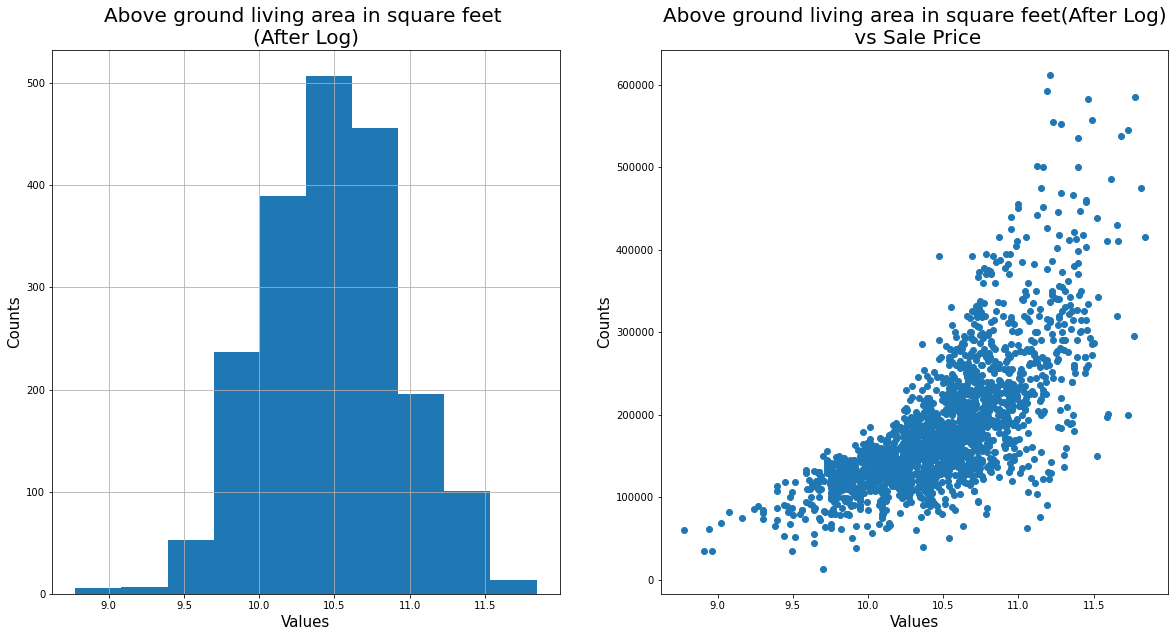

In [67]:
# Plot histogram after log transformation
plt.subplot(1, 2, 1) # row 1, col 2 index 1
train_eda['log_gr_liv_area'].hist(figsize = (20, 10))
plt.title('Above ground living area in square feet \n(After Log)', fontsize = 20)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tick_params(labelsize = 10);

# Plot scatterplot after log transformation
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(train_eda['log_gr_liv_area'], train_eda['saleprice'])
plt.title('Above ground living area in square feet(After Log)\n vs Sale Price', fontsize = 20)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tick_params(labelsize = 10);

In [68]:
# Get the revised R2 scores after applying log transformation
features = [col for col in train_eda._get_numeric_data().columns if col != 'saleprice' and col != 'log_saleprice' and col != 'gr_liv_area']
X = train_eda[features]
y = train_eda['log_saleprice']

lin_reg(X,y)

Linear Regression R2 scores: [0.91930558 0.91231513 0.88694341 0.8691399  0.92302375]
Linear Regression mean R2 score: 0.9021455534562932


After applying logarithmic transformation to `gr_liv_area` and deleting the outliers, the distribution looks normal now. Also, we have managed to increase the mean $R^2$ cross validation score from 0.82556 to 0.90215!

**1.4. Height of the basement**

Feature pertains to the height of the basement.

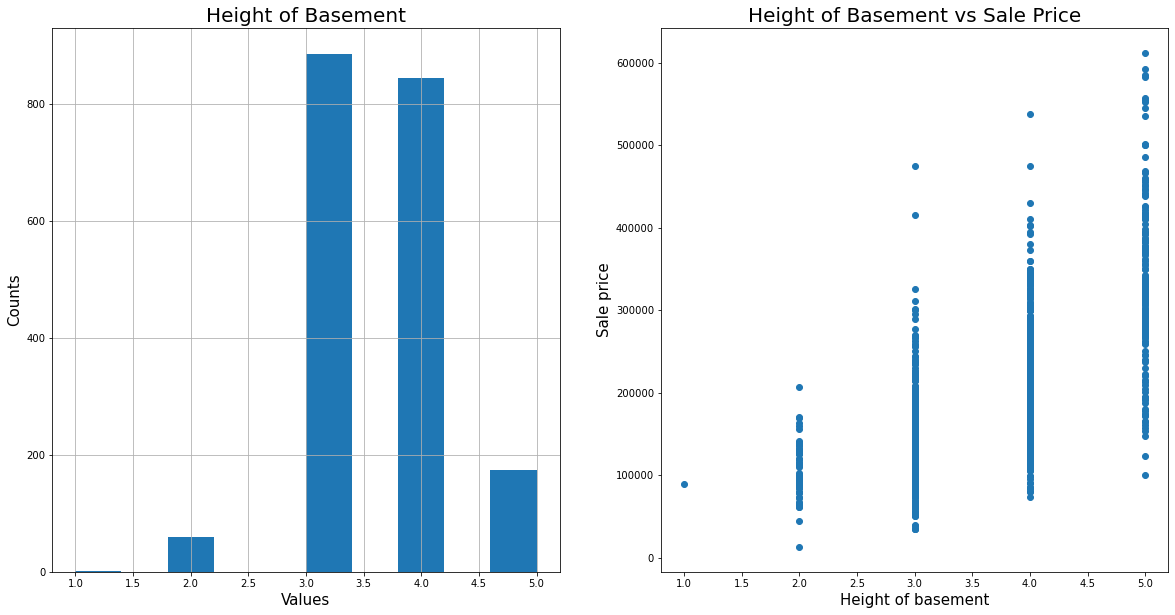

In [69]:
# Plot histogram of 'bsmt_qual'
plt.subplot(1, 2, 1) # row 1, col 2 index 1
train_eda['bsmt_qual'].hist(figsize = (20, 10))
plt.title('Height of Basement', fontsize = 20)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tick_params(labelsize = 10);

# Plot scatterplot of 'bsmt_qual'
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(train_eda['bsmt_qual'], train_eda['saleprice'])
plt.title('Height of Basement vs Sale Price', fontsize = 20)
plt.xlabel('Height of basement', fontsize = 15)
plt.ylabel('Sale price', fontsize = 15)
plt.tick_params(labelsize = 10);

Distribution of Basement Height approximates a normal distribution. Hence, there is no need to perform log transformation on `bsmt_qual`. 

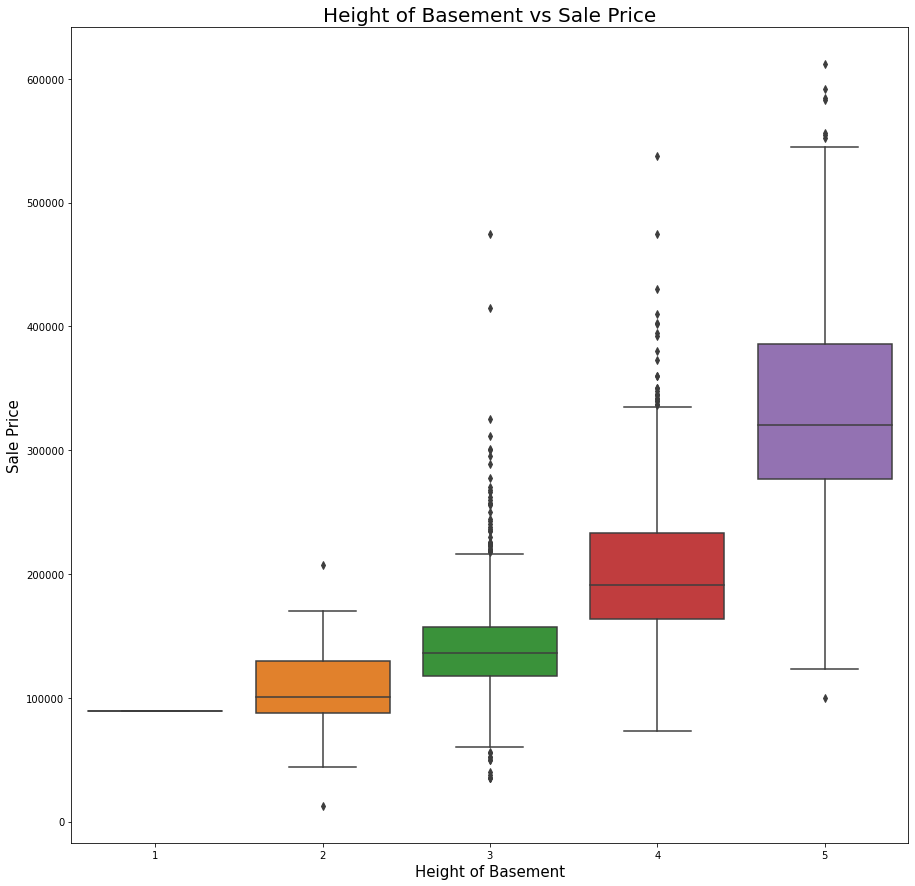

In [70]:
# Plot a box plot to compare Height of Basement vs Sale Price
plt.figure(figsize = (15,15))
sns.boxplot(x = train_eda['bsmt_qual'], y = train_eda['saleprice'], data = train_eda)
plt.title('Height of Basement vs Sale Price', fontsize = 20)
plt.xlabel('Height of Basement', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
plt.tick_params(labelsize = 10);

The chart above shows that houses with higher basement usually commands a higher sale price. The interquartile range is significantly higher for houses with basement height category 4 (basement height of 90-99 inches) and 5 (Basement height of over 100 inches).

**1.5. Size of Garage**

Feature pertains to size of garage in car capacity.

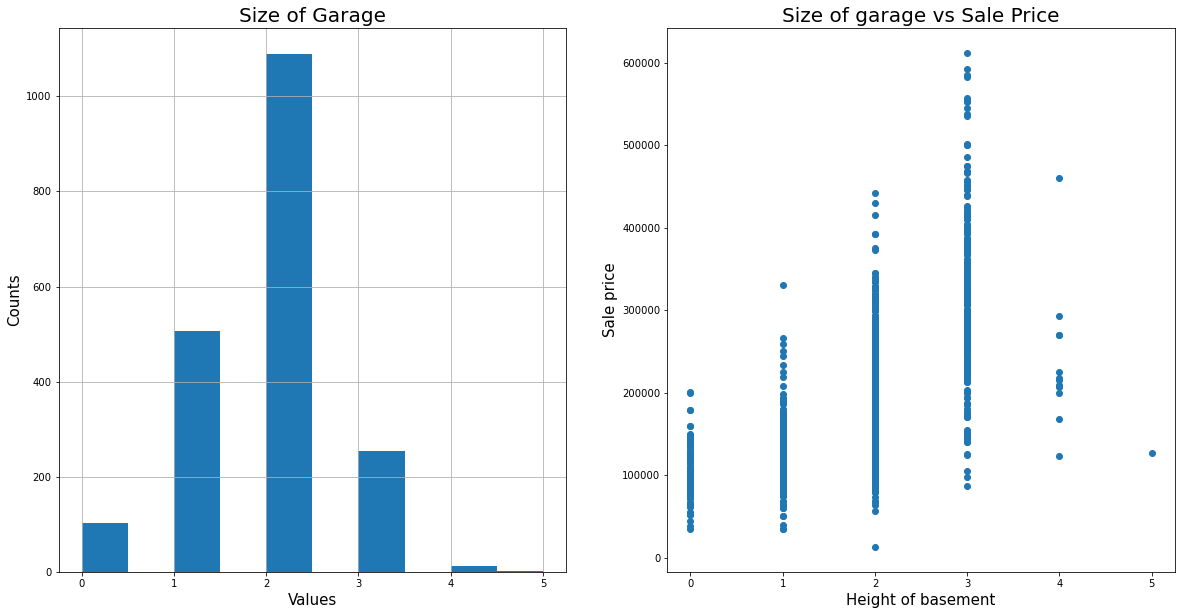

In [71]:
# Plot histogram of 'garage_cars'
plt.subplot(1, 2, 1) # row 1, col 2 index 1
train_eda['garage_cars'].hist(figsize = (20, 10))
plt.title('Size of Garage', fontsize = 20)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tick_params(labelsize = 10);

# Plot scatterplot of 'garage_cars'
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(train_eda['garage_cars'], train_eda['saleprice'])
plt.title('Size of garage vs Sale Price', fontsize = 20)
plt.xlabel('Height of basement', fontsize = 15)
plt.ylabel('Sale price', fontsize = 15)
plt.tick_params(labelsize = 10);

The Size of Garage approximates a normal distribution, hence we will not apply log transformation to `garage_cars`.

**1.6. First Floor Square Feet**

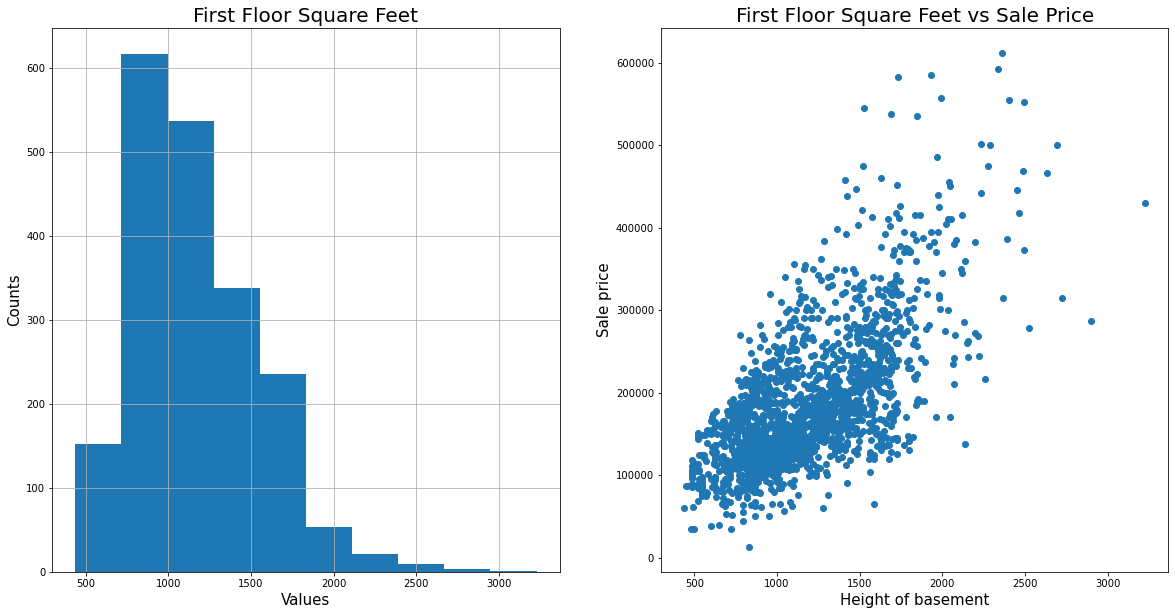

In [72]:
# Plot histogram of '1st_flr_sf'
plt.subplot(1, 2, 1) # row 1, col 2 index 1
train_eda['1st_flr_sf'].hist(figsize = (20, 10))
plt.title('First Floor Square Feet', fontsize = 20)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tick_params(labelsize = 10);

# Plot scatterplot of '1st_flr_sf'
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(train_eda['1st_flr_sf'], train_eda['saleprice'])
plt.title('First Floor Square Feet vs Sale Price', fontsize = 20)
plt.xlabel('Height of basement', fontsize = 15)
plt.ylabel('Sale price', fontsize = 15)
plt.tick_params(labelsize = 10);

First Floor Square Feet seems to be slightly skewed to the right and follows a power law distribution. Since linear regression assumes normality, we shall apply logarithmic transformation to `1st_flr_sf` to normalise it.

In [73]:
# log_transformation for '1st_flr_sf'
train_eda['log_1st_flr_sf'] = np.log2(train_eda['1st_flr_sf']+1)

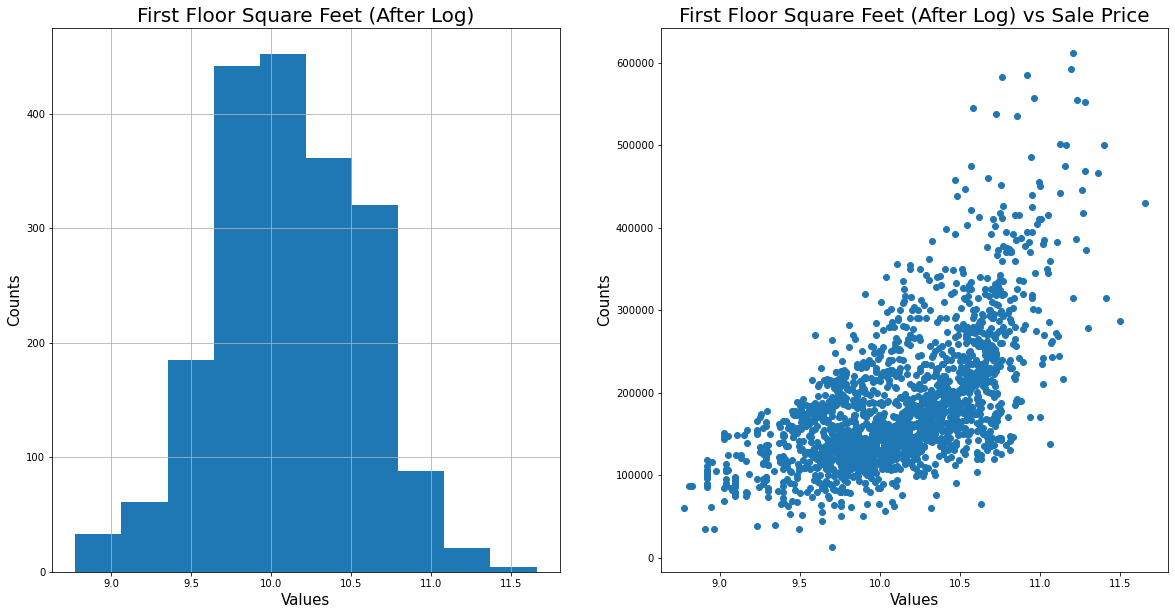

In [74]:
# Plot histogram after log transformation
plt.subplot(1, 2, 1) # row 1, col 2 index 1
train_eda['log_1st_flr_sf'].hist(figsize = (20, 10))
plt.title('First Floor Square Feet (After Log)', fontsize = 20)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tick_params(labelsize = 10);

# Plot scatterplot after log transformation
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(train_eda['log_1st_flr_sf'], train_eda['saleprice'])
plt.title('First Floor Square Feet (After Log) vs Sale Price', fontsize = 20)
plt.xlabel('Values', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tick_params(labelsize = 10);

In [75]:
# Get the revised R2 after log transformation
features = [col for col in train_eda._get_numeric_data().columns if col != 'saleprice' and col != 'log_saleprice' and col != 'gr_liv_area' and col != '1st_flr_sf']
X = train_eda[features]
y = train_eda['log_saleprice']

lin_reg(X,y)

Linear Regression R2 scores: [0.9197067  0.91274114 0.88800954 0.86925219 0.92283463]
Linear Regression mean R2 score: 0.9025088406770377


Similarly, after applying log transformation to `1st_flr_sf`, the distribution looks normal now. The mean cross validation score has also increased slightly to 0.90.

## Regularisation Regression

**1. Standardize the predictors.**


Since we're using Lasso and Ridge, we'll want to scale our features. Standardization is necessary for regularized regression because the beta values for each predictor variable must be on the same scale. If betas are different sizes just because of the scale of predictor variables the regularization term can't determine which betas are more/less important based on their size.

In [76]:
# Setting the X and y variables
features = [col for col in train_eda._get_numeric_data().columns if col != 'saleprice' and col != 'log_saleprice' and col != 'gr_liv_area' and col != '1st_flr_sf']
X = train_eda[features]
y = train_eda['log_saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize the StandardScaler object
ss = StandardScaler()

# Use the "fit_transform" function to standardize the X design matrix
X_train_ss = ss.fit_transform(X_train)

### Ridge Regression

**2. Find an optimal value for Ridge regression alpha using RidgeCV.**

Search for the best alpha value through logarithmic space (np.logspace).

In [77]:
# Search for the best alpha value
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_train_ss, y_train)

print (f'Optimal Alpha: {optimal_ridge.alpha_}')

Optimal Alpha: 153.43684089300132


**3. Cross-validate the Ridge regression $R^2$ with the optimal alpha.**

In [78]:
# Cross-validate Ridge regression R2 with the optimal alpha
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge_scores_v1 = cross_val_score(ridge, X_train_ss, y_train, cv=5)

print(f'Ridge R2 scores: {ridge_scores_v1}')
print(f'Ridge mean R2 scores: {np.mean(ridge_scores_v1)}.')

Ridge R2 scores: [0.92678007 0.91580024 0.89430974 0.86880809 0.93497978]
Ridge mean R2 scores: 0.9081355838467287.


### Lasso Regression

**4. Find an optimal value for Lasso Regression alpha using LassoCV.**

In [79]:
# Find an optimal value for Lasso Regression alpha using LassoCV
optimal_lasso = LassoCV(n_alphas=500, cv=5)
optimal_lasso.fit(X_train_ss, y_train)

print (f'Optimal Lasso: {optimal_lasso.alpha_}')

Optimal Lasso: 0.0033636807059468565


**5. Cross-validate the Lasso Regression $R^2$ with the optimal alpha.**

In [80]:
# Cross-validate the Lasso Regression R2 with the optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores_v1 = cross_val_score(lasso, X_train_ss, y_train, cv=5)

print (f'Lasso R2 scores: {lasso_scores_v1}')
print (f'Lasso mean R2 scores: {np.mean(lasso_scores_v1)}')

Lasso R2 scores: [0.92586393 0.92108674 0.89467916 0.87533327 0.94064616]
Lasso mean R2 scores: 0.9115218515678439


**6.1. Use Regularisation Model for Feature Selection.**

Lasso Regression shrinks the coefficients of the weaker variables to 0, hence we can drop these variables and re-re-run the model to improve model performance.

In [81]:
# Check the coefficients of the variables in the model
lasso.fit(X_train_ss,y_train)
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
lasso_coefs = lasso_coefs.reset_index(drop = True)

lasso_coefs.head(30)

,variable,coef,abs_coef
0,log_gr_liv_area,0.169449,0.169449
1,overall_qual,0.139062,0.139062
2,bsmtfin_sf_1,0.067241,0.067241
3,overall_cond,0.057929,0.057929
4,log_1st_flr_sf,0.047162,0.047162
5,lot_area,0.040591,0.040591
6,garage_cars,0.040022,0.040022
7,functional,0.034862,0.034862
8,bsmt_qual,0.034386,0.034386
9,year_remod/add,0.030542,0.030542


The model zeroed out the majority of the features and selected, 'overall quality' (`overall_qual`), 'above grade living area square feet' (`gr_liv_area`), 'size of garage' (`garage_car`), 'height of basement' (`bsmt_qual`) and '1st floor square feet' (`1st_flr_sf`).

The model has also selected several features that made sense such as 'overall general condition of the house' (`overall_cond`), "neighbourhood the house is located in" (`neighbourhood`).  In general, the location of the house, size and quality of the house, basement and garage plays a major role in determining the sale price of the house.

We will keep those variables that have coefficient values of at least 0.015.

In [82]:
# Keep features that have coefficient values of at least 0.017
keep_features = []
for key,value in lasso_coefs.iterrows():
    if value['abs_coef'] > 0.017:
        keep_features.append(value['variable'])
print(f"We have reduced the number of features from {len(features)} to {len(keep_features)}.")

We have reduced the number of features from 206 to 23.


**7. Testing data with the features that we have kept.**

**7.1. Check the new Baseline Model's $R^2$.**

In [83]:
# Set X and y variable using the features we have kept
X = train_eda[keep_features]
y = train_eda['log_saleprice']

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate/fit the model
dr = DummyRegressor()
dr.fit(X_train, y_train)

# Derive the cross valuation score for Linear Regression
dr_scores_v2 = cross_val_score(dr, X_train, y_train, cv=5)
print(f'Dummy Regressor R2 scores: {dr_scores_v2}')
print(f'Dummy Regressor mean R2 score: {dr_scores_v2.mean()}')
print(f'The Dummy Regressor R2 mean score has changed from -0.00488 to {round(dr_scores_v2.mean(),5)}.')

Dummy Regressor R2 scores: [-0.02326513 -0.00864493 -0.01333155 -0.00115933 -0.00031787]
Dummy Regressor mean R2 score: -0.009343761139343654
The Dummy Regressor R2 mean score has changed from -0.00488 to -0.00934.


**7.2. Check the new Linear Regression's $R^2$.**

Check if the Linear Regression $R^2$ score has improved.

In [84]:
# Set X and y variable using the features we have kept
X = train_eda[keep_features]
y = train_eda['log_saleprice']

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate/fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Derive the cross valuation score for Linear Regression
lr_scores_v2 = cross_val_score(lr, X_train, y_train, cv=5)
print(f'Linear Regression R2 scores: {lr_scores_v2}')
print(f'Linear Regression mean R2 score: {lr_scores_v2.mean()}')
print(f'The Linear Regression R2 mean score has changed from 0.90251 to {round(lr_scores_v2.mean(),5)}.')

Linear Regression R2 scores: [0.917031   0.91119833 0.89058322 0.88106748 0.93525217]
Linear Regression mean R2 score: 0.9070264405644709
The Linear Regression R2 mean score has changed from 0.90251 to 0.90703.


**7.3. Standadize the new predictors**

Standadize the new predictors using the new features identified.

In [85]:
# Setting the new X and y variables
X = train_eda[keep_features]
y = train_eda['log_saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize the StandardScaler object
ss = StandardScaler()

# Use the "fit_transform" function to standardize the X design matrix
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

**7.4. Check the new Ridge Regression $R^2$**

Check if the Ridge Regression $R^2$ score has improved.

In [86]:
# Search for the best alpha value
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_train_ss, y_train)

print (f'Optimal Alpha: {optimal_ridge.alpha_}')

Optimal Alpha: 40.5546073584083


In [87]:
# Cross-validate Ridge regression R2 with the optimal alpha
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores_v2 = cross_val_score(ridge, X_train_ss, y_train, cv=5)

print(f'Ridge scores: {ridge_scores_v2}')
print(f'Ridge mean scores: {np.mean(ridge_scores_v2)}.')
print(f'The Ridge mean R2 score has changed from {round(np.mean(ridge_scores_v1),5)} to {round(np.mean(ridge_scores_v2),5)}.')

Ridge scores: [0.91728898 0.91216189 0.89219728 0.87964882 0.93505622]
Ridge mean scores: 0.9072706371594611.
The Ridge mean R2 score has changed from 0.90814 to 0.90727.


**7.5. Check the new Lasso Regression $𝑅^2$.**

Check if the Lasso Regression $R^2$ score has improved.

In [88]:
# Find an optimal value for Lasso Regression alpha using LassoCV
optimal_lasso = LassoCV(n_alphas=500, cv=5)
optimal_lasso.fit(X_train_ss, y_train)

print (f'Optimal Lasso: {optimal_lasso.alpha_}')

Optimal Lasso: 0.00047766054885469404


In [89]:
# Cross-validate the Lasso Regression R2 with the optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores_v2 = cross_val_score(lasso, X_train_ss, y_train, cv=5)

print (f'Lasso scores: {lasso_scores_v2}')
print (f'Lasso mean scores: {np.mean(lasso_scores_v2)}')
print(f'The Lasso mean R2 score has changed from {round(np.mean(lasso_scores_v1),5)} to {round(np.mean(lasso_scores_v2),5)}.')

Lasso scores: [0.91716253 0.91165564 0.89043803 0.88077865 0.93515384]
Lasso mean scores: 0.9070377377296813
The Lasso mean R2 score has changed from 0.91152 to 0.90704.


**7.6. Train results summary**

|Model|Train Results<br>(Before amending model)|Train Results<br>(After amending model)
|:--|:-:|:-:|
|Baseline Model|-0.00488|-0.00934|
|Linear Regression|0.90251|0.90703|
|**Ridge Regression**|**0.90814**|**0.90727**|
|Lasso Regression|0.91152|0.90704|

After dropping the 180 features from the model, the $R^2$ scores for Linear Regression has increased from 0.90251 to 0.90703 respectively. However, the $R^2$ score for Ridge Regression has decreased slightly from 0.90814 to 0.90727 and while Lasso Regression's $R^2$ score has decreased from 0.91152 to 0.90704. As the new models are much simpler and yields high $R^2$ of over 90%, we will retain these new models. All 3 models yield similar results with Ridge Regression giving a slightly better results than the other 2 models.

These results are within our expectations as both Ridge and Lasso Regression are regularization model and regularization is a useful technique that can help in improving the fit of your regression models. It significantly reduces the variance of the model without substantial increase in its bias.

## Model Test Results

**1. Test results using Baseline Model**

In [90]:
# Constructing a baseline model by using dummy regressor to predict using mean
dr.fit(X_train, y_train)
print(f'Baseline model R2 train score: {round(dr.score(X_train, y_train),5)}.')
print(f'Baseline model R2 test score: {round(dr.score(X_test, y_test),5)}.')

Baseline model R2 train score: 0.0.
Baseline model R2 test score: -0.00115.


**2. Test results using Linear Regression**

In [91]:
# Run test data using Linear Regression
lr.fit(X_train, y_train)
print(f'Linear Regression R2 train score: {round(lr.score(X_train, y_train),5)}.')
print(f'Linear Regression R2 test score: {round(lr.score(X_test, y_test),5)}.')

Linear Regression R2 train score: 0.91277.
Linear Regression R2 test score: 0.89199.


**3. Test results using Ridge Regression**

In [92]:
# Run test data using Ridge Regression
ridge.fit(X_train_ss, y_train)
print(f'Ridge train R2 score: {round(ridge.score(X_train_ss, y_train),5)}.')
print(f'Ridge test R2 score: {round(ridge.score(X_test_ss, y_test),5)}.')

Ridge train R2 score: 0.91263.
Ridge test R2 score: 0.89355.


**4. Test results using Lasso Regression**

In [93]:
# Run test data using Lasso Regression
lasso.fit(X_train_ss, y_train)
print(f'Lasso train R2 score: {round(lasso.score(X_train_ss, y_train),5)}.')
print(f'Lasso test R2 score: {round(lasso.score(X_test_ss, y_test),5)}.')

Lasso train R2 score: 0.91277.
Lasso test R2 score: 0.89233.


**5. Test results summary**

|Model|Train Results|Test Results
|:--|:-:|:-:|
|Baseline Model|0.00000|-0.00115|
|Linear Regression|0.91277|0.89199|
|**Ridge Regression**|**0.91263**|**0.89355**|
|Lasso Regression|0.91277|0.89233|

We have ran the 3 models using the test data and noted that the test results are not significantly different from the train results. The difference between the train and test results is about 0.02. Similar to the train results summary seen above, Ridge Regression gives us the best test results. Thus, we will use this model for predicting sale prices in the `test` dataset.

## Model Interpretation

Lets look at what makes up the model.

In [94]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X_train.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(ridge.fit(X_train_ss, y_train).coef_)

# Preview variables' coefficient values in descending order
# The higher the values, the stronger the variables
print(coefficient_df.sort_values('Coefficient_Value', ascending = False).reset_index().drop(columns = ['index']))

             Column_Name  Coefficient_Value
0        log_gr_liv_area           0.177550
1           overall_qual           0.154168
2           overall_cond           0.069182
3           bsmtfin_sf_1           0.063556
4         log_1st_flr_sf           0.054000
5               lot_area           0.051538
6       foundation_PConc           0.049565
7            garage_cars           0.045904
8              bsmt_qual           0.045214
9         year_remod/add           0.040262
10            functional           0.037140
11           paved_drive           0.032287
12         sale_type_New           0.027033
13          screen_porch           0.024727
14  exterior_1st_BrkFace           0.023365
15         bsmt_exposure           0.019856
16  neighborhood_NridgHt           0.018682
17        bsmt_full_bath           0.015955
18          heating_Grav          -0.022817
19  neighborhood_Edwards          -0.025757
20  neighborhood_OldTown          -0.026336
21          ms_zoning_RM        

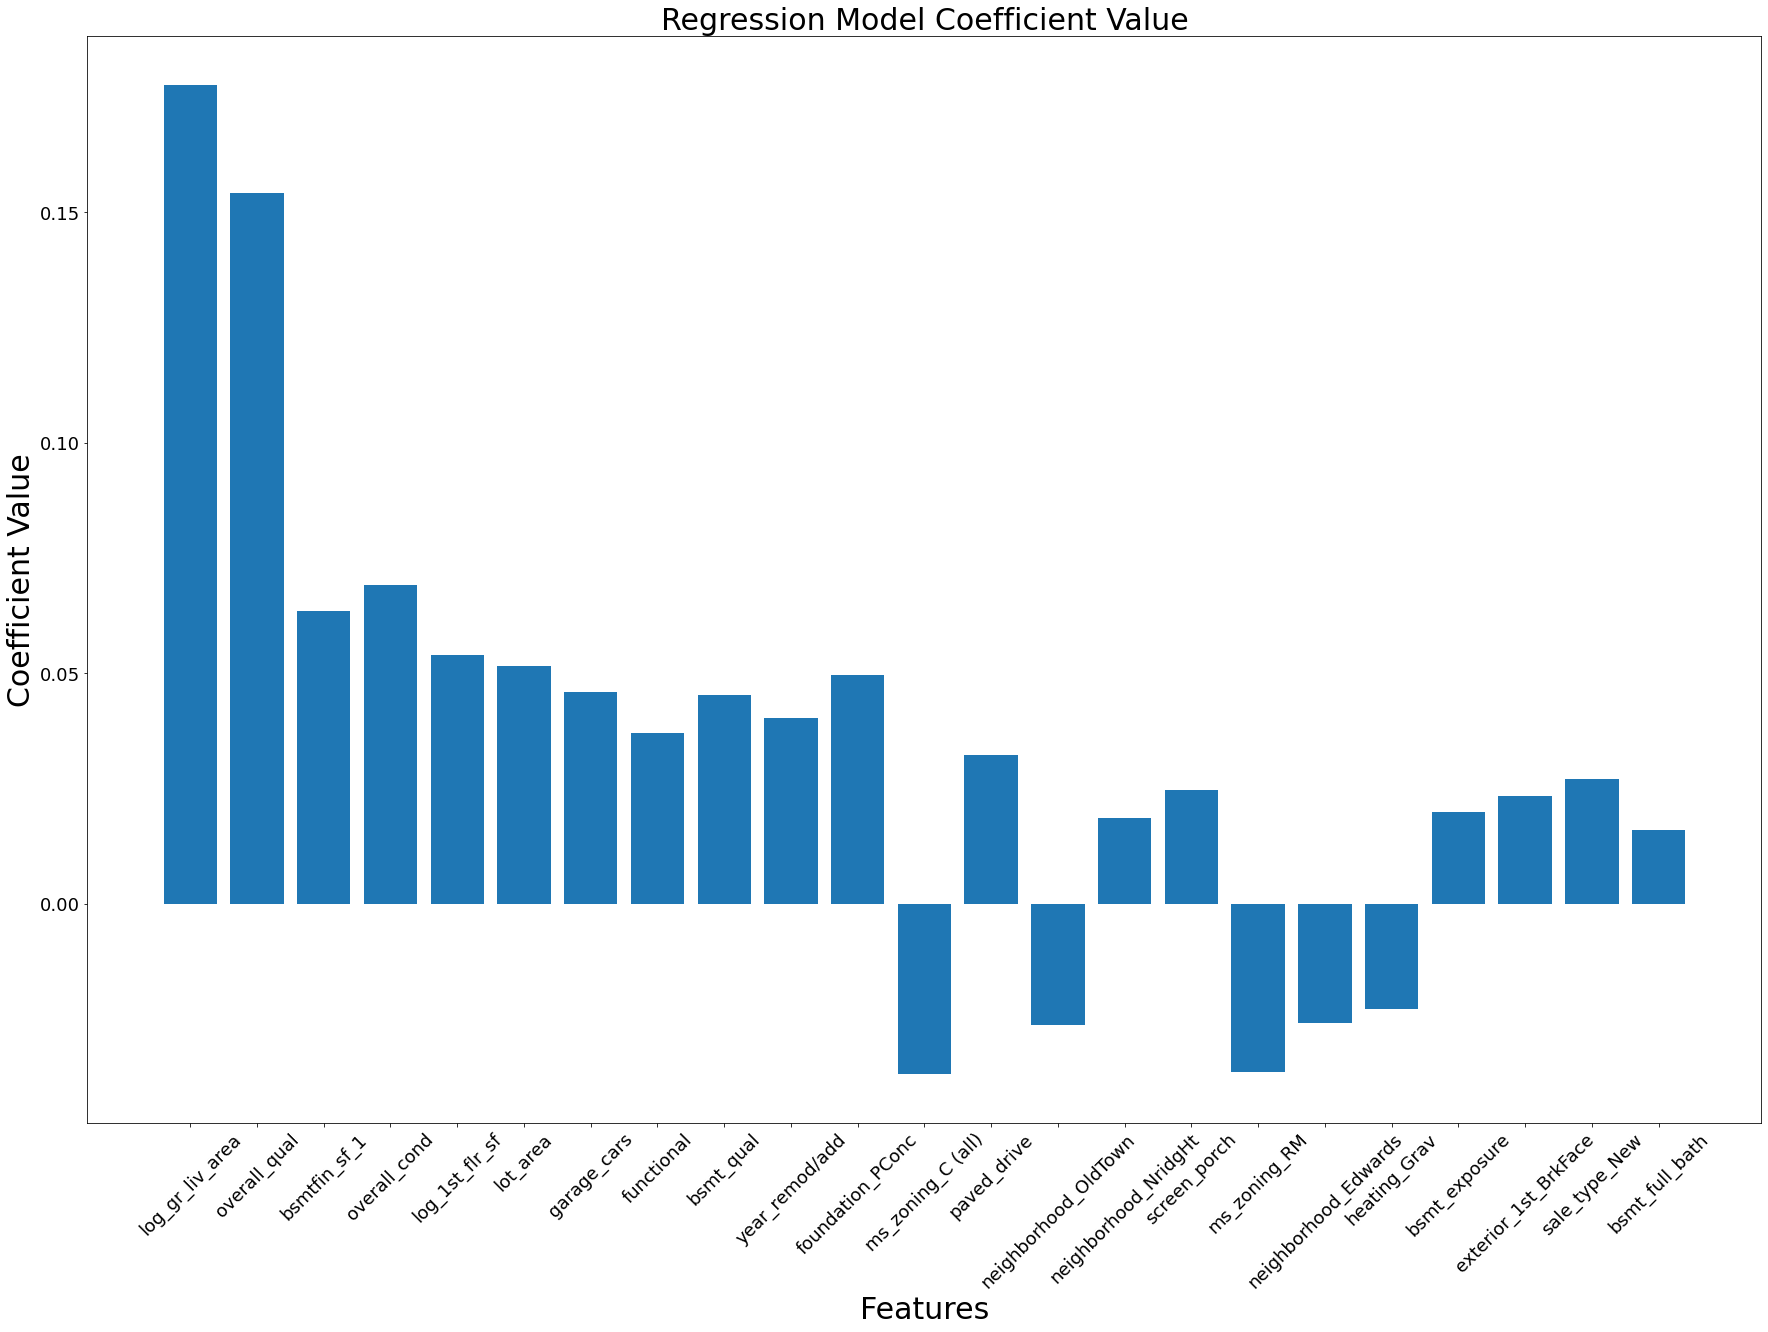

In [95]:
# Plot the coefficent values
plt.rcParams['figure.figsize'] = (30,20)
plt.bar(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value'])
plt.title('Regression Model Coefficient Value', fontsize = 30)
plt.tick_params(labelsize = 18)
plt.xticks(rotation = 45)
plt.xlabel('Features', fontsize = 30)
plt.ylabel('Coefficient Value', fontsize = 30);

A positive coefficient indicates that as the value of the independent variable increases, sale prices also tends to increase. A negative coefficient suggests that as the independent variable increases, the sale price tends to decrease.

The coefficient value signifies how much the sale price changes given a one-unit shift in the independent variable while holding other variables in the model constant. However, since we have applied logarithmic transformation to `saleprice`, the coefficient value actually how much the logarithmic sale price changes given a one-unit shift in the independent variable instead. We will do some transformation to see the actual impact of one-unit shift in the independent variable on `saleprice`.

In [96]:
# Identify the columns that have been log transformed
log_col = ['log_gr_liv_area', 'log_1st_flr_sf']

# Apply log inverese to all the columns
coefficient_df['percentage_change'] = 2**coefficient_df['Coefficient_Value']-1

# Iterate through dataframe and change values for columns that have been log transformed
for key, value in coefficient_df.iterrows():
    if value['Column_Name'] in log_col:
        coefficient_df['percentage_change'].iloc[key] = value['Coefficient_Value']
        
# Preview variables' coefficient values in descending order
# The higher the values, the stronger the variables
print(coefficient_df.sort_values('percentage_change', ascending = False).reset_index().drop(columns = ['index']))

             Column_Name  Coefficient_Value  percentage_change
0        log_gr_liv_area           0.177550           0.177550
1           overall_qual           0.154168           0.112779
2         log_1st_flr_sf           0.054000           0.054000
3           overall_cond           0.069182           0.049122
4           bsmtfin_sf_1           0.063556           0.045038
5               lot_area           0.051538           0.036369
6       foundation_PConc           0.049565           0.034953
7            garage_cars           0.045904           0.032330
8              bsmt_qual           0.045214           0.031837
9         year_remod/add           0.040262           0.028300
10            functional           0.037140           0.026078
11           paved_drive           0.032287           0.022632
12         sale_type_New           0.027033           0.018914
13          screen_porch           0.024727           0.017287
14  exterior_1st_BrkFace           0.023365           0

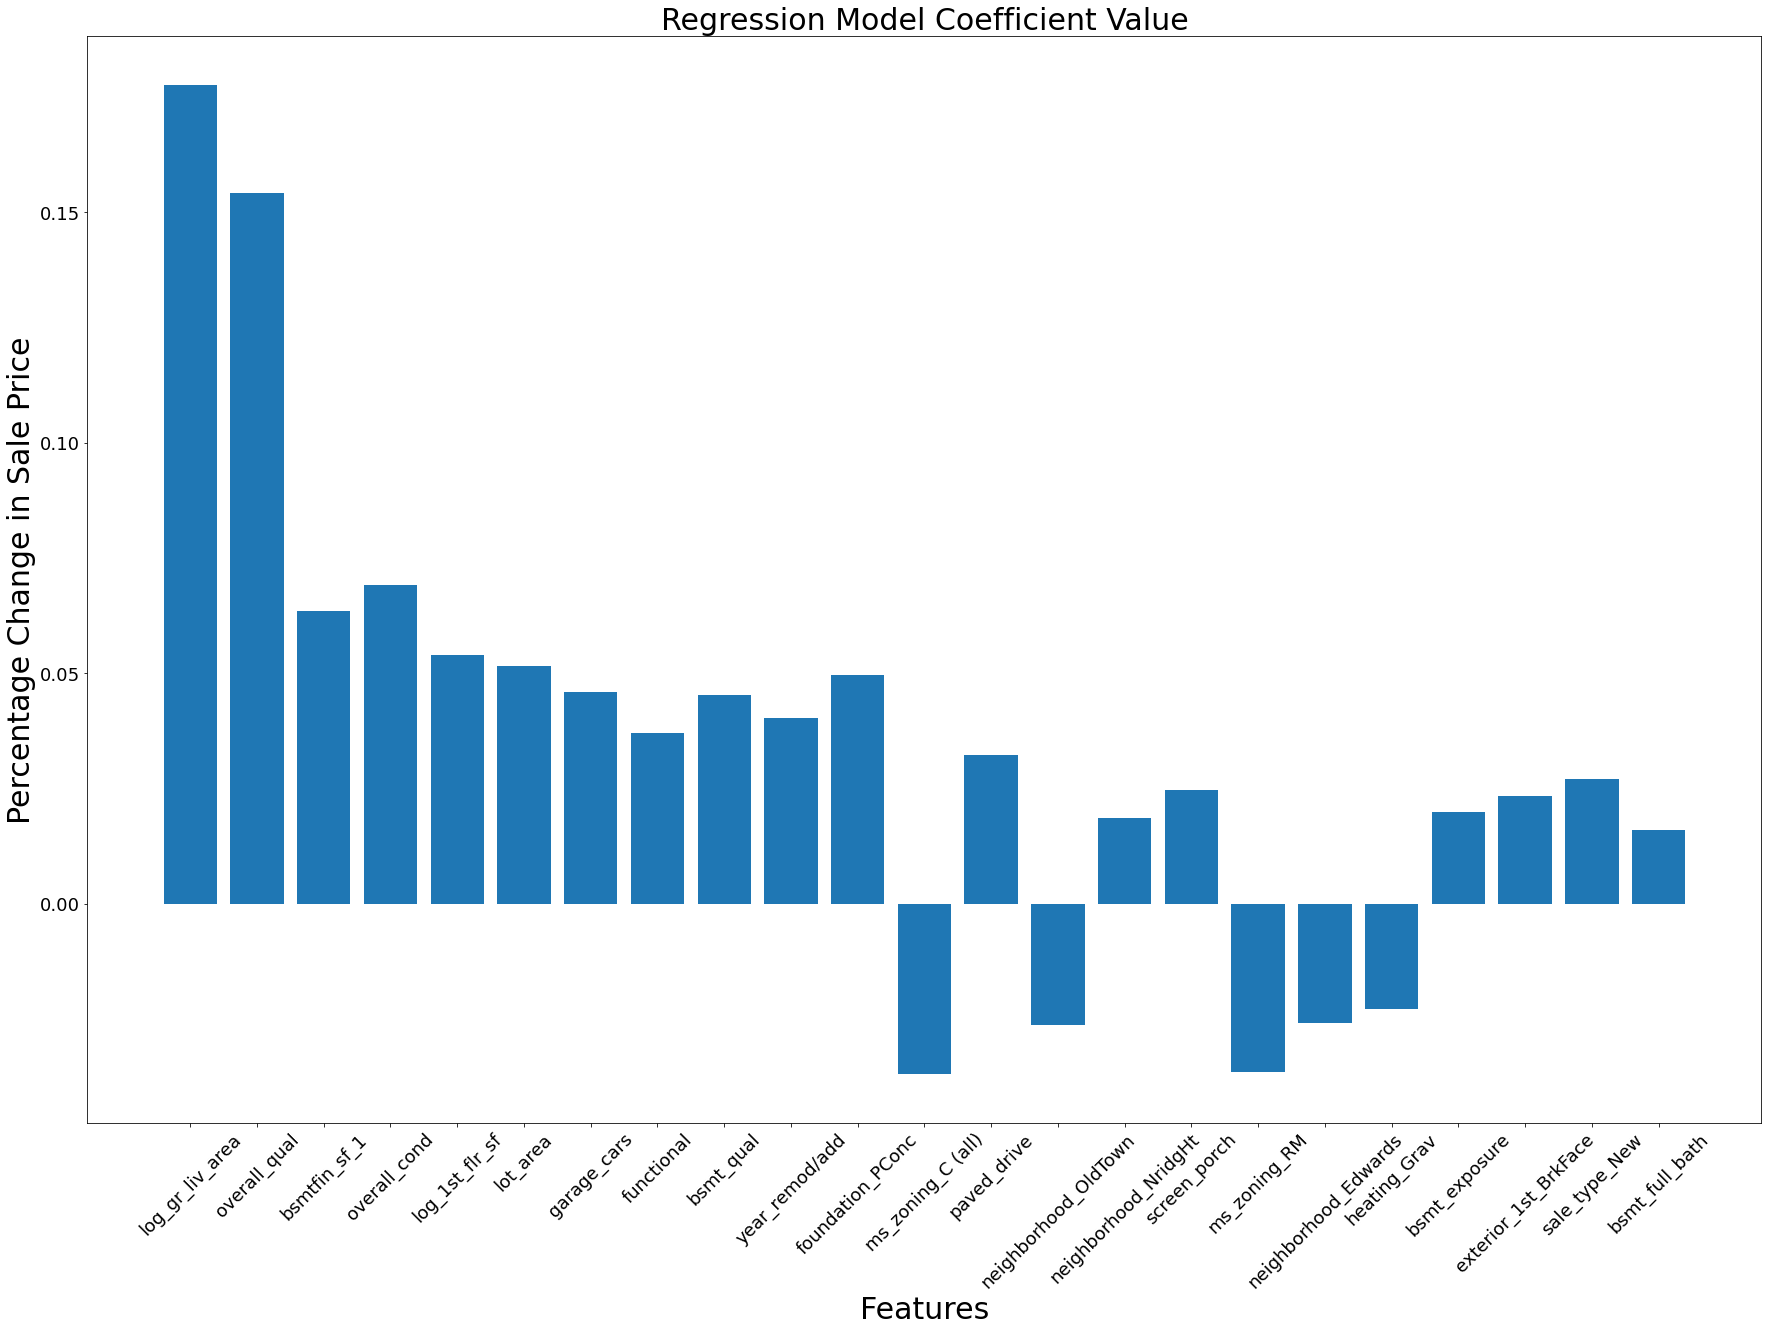

In [97]:
# Plot the coefficent values
plt.rcParams['figure.figsize'] = (30,20)
plt.bar(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value'])
plt.title('Regression Model Coefficient Value', fontsize = 30)
plt.tick_params(labelsize = 18)
plt.xticks(rotation = 45)
plt.xlabel('Features', fontsize = 30)
plt.ylabel('Percentage Change in Sale Price', fontsize = 30);

After applying the transformation, we can now see the actual impact of one-unit shift in the independent variable on `saleprice`. For example, one unit shift in "Above Ground Living Area" will cause a 17.76% shift in sale price.

Do note that "Foundation - Conrete", "Type of Sale - New", "Exterior - Brick Face", "Neighbourhood - Northridge Heights", "Heating - Gravity Furnace", "Neighbourhood - Edwards", "Neighbourhood - OldTown", "Zone - Resid Med Density" and "Zone - Commercial" are categorical data and the only possible values are yes or no. Thus, a unit shift simplely means that they move from being in these categories to not being in these categories and vice versa. This means that there is a limit to which they impact the sale prices.

## Predicting Sale Prices in Test Dataset

### Cleaning the `test` dataset

**1. Check data types for all the columns, convert strings to numbers for numbers column.**

In [98]:
# Check data type for all the columns
print(test.dtypes.to_string())

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1         int64
bsmtfin_type_2      object
b

There are no number columns being denominated as strings, hence no further conversions required at this point.

**2. Check number of rows vs number of columns.**

In [99]:
# Check number of rows vs number of columns
print(f"(Rows, Columns): {test.shape}")

(Rows, Columns): (878, 80)


**3.1. Check for null values in the `test` dataset.**

In [100]:
# Check columns with null values
test_is_null = test.isnull().sum()

# For those items with missing values, present it as a percentage of the number of total rows
test_is_null_df = pd.DataFrame([])

for key,value in test_is_null.iteritems():
    if value != 0:
        test_is_null_df = test_is_null_df.append(pd.DataFrame({'column name': key, 'no of null rows': value}, index = [0]))

test_is_null_df = test_is_null_df.reset_index().drop(columns = ['index'])
test_is_null_df["% of missing values"] = round((test_is_null_df["no of null rows"]/2051*100),2)

print("Columns with missing values:")
display(test_is_null_df)

Columns with missing values:


,column name,no of null rows,% of missing values
0,lot_frontage,160,7.80
1,alley,820,39.98
2,mas_vnr_type,1,0.05
3,mas_vnr_area,1,0.05
4,bsmt_qual,25,1.22
5,bsmt_cond,25,1.22
6,bsmt_exposure,25,1.22
7,bsmtfin_type_1,25,1.22
8,bsmtfin_type_2,25,1.22
9,electrical,1,0.05


There are quite a number of columns with null values. Lets do a check to see if the columns being used in the model has any null values.

**3.2. Check if columns used in the model has null values**

In [101]:
# Check if columns being used in the model has null values
model_features = ['gr_liv_area', 'overall_qual', 'bsmtfin_sf_1', 'overall_cond', '1st_flr_sf', 'lot_area', 'garage_cars', 'functional', 'bsmt_qual', 'year_remod/add', 'foundation', 'ms_zoning', 'paved_drive', 'neighborhood', 'screen_porch', 'heating', 'bsmt_exposure', 'exterior_1st', 'sale_type', 'bsmt_full_bath', 'heating_qc']

print("Columns in model that have null values:")
for key, value in test_is_null_df.iterrows():
    if value['column name'] in model_features:
        print(value['column name'])

Columns in model that have null values:
bsmt_qual
bsmt_exposure


`bsmt_qual` and `bsmt_exposure` contains null values and are included in the model. Let's take a look at these columns.

**Basement Quality and Basement Exposure**

In [102]:
# Filter null values in the column 'bsmt_qual'
test[test['bsmt_qual'].isnull()].head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
15,2089,905480180,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD
37,2071,905228020,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,4,7,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseA,998,0,0,998,0,0,1,0,3,1,TA,5,Min2,0,NaN,2Types,1952.0,Unf,2,460,Fa,TA,Y,0,0,140,0,0,0,NaN,NaN,NaN,0,5,2007,WD
76,971,923202060,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,4,1960,2006,Hip,CompShg,HdBoard,HdBoard,BrkFace,75.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1771,0,0,1771,0,0,1,0,3,1,TA,9,Min1,1,TA,Attchd,1960.0,Unf,2,336,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,11,2009,WD
78,1887,534276290,20,RL,NaN,8339,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,1959,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,882,0,0,882,0,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1959.0,RFn,1,294,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,Shed,1200,7,2007,WD
112,2005,902427180,80,RM,76.0,11800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,SLvl,4,7,1949,2002,Gable,CompShg,Stucco,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1382,0,0,1382,0,0,2,0,1,1,TA,6,Mod,1,TA,Attchd,1957.0,RFn,1,384,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD


In [103]:
test[test['bsmt_exposure'].isnull()].head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
15,2089,905480180,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD
37,2071,905228020,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,4,7,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseA,998,0,0,998,0,0,1,0,3,1,TA,5,Min2,0,NaN,2Types,1952.0,Unf,2,460,Fa,TA,Y,0,0,140,0,0,0,NaN,NaN,NaN,0,5,2007,WD
76,971,923202060,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,4,1960,2006,Hip,CompShg,HdBoard,HdBoard,BrkFace,75.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1771,0,0,1771,0,0,1,0,3,1,TA,9,Min1,1,TA,Attchd,1960.0,Unf,2,336,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,11,2009,WD
78,1887,534276290,20,RL,NaN,8339,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,1959,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,882,0,0,882,0,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1959.0,RFn,1,294,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,Shed,1200,7,2007,WD
112,2005,902427180,80,RM,76.0,11800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,SLvl,4,7,1949,2002,Gable,CompShg,Stucco,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1382,0,0,1382,0,0,2,0,1,1,TA,6,Mod,1,TA,Attchd,1957.0,RFn,1,384,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD


Similar to the analysis done for the train dataset, the null values in `bsmt_qual` and `bsmt_exposure` are due to houses that have no basement. We shall replace the null values in the column with "NoBasement".

In [104]:
# Replace null values in 'bsmt_qual' and `bsmt_exposure` with 'NoBasement'
test['bsmt_qual'] = test['bsmt_qual'].fillna("NoBasement")
test['bsmt_exposure'] = test['bsmt_exposure'].fillna("NoBasement")

# Check the null values in the above mentioned columns after executing changes
print("Number of null values:")
print("")
print(test[['bsmt_qual', 'bsmt_exposure']].isnull().sum())

Number of null values:

bsmt_qual        0
bsmt_exposure    0
dtype: int64


### Feature Engineering on the `test` dataset

**4. Mapping ordinal values to numeric representations.**

Ordinal attributes are categorical attributes with a sense of order amongst the values. Similar to the `train` dataset, we will map and transform the values in these columns based on the order.

In [105]:
# Create a copy of the dataset before making amendments
test_eda = test

# Mapping of the "bsmt_qual" column:
bsmt_qual_ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoBasement': 0}
test_eda['bsmt_qual'] = test_eda['bsmt_qual'].map(bsmt_qual_ord_map)

# Mapping of the "bsmt_exposure" column:
bsmt_exposure_ord_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NoBasement': 0}
test_eda['bsmt_exposure'] = test_eda['bsmt_exposure'].map(bsmt_exposure_ord_map)

# Mapping of the "heating_qc" column:
heating_qc_ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
test_eda['heating_qc'] = test_eda['heating_qc'].map(heating_qc_ord_map)

# Mapping of the "kitchen_qual" column:
kitchen_qual_ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
test_eda['kitchen_qual'] = test_eda['kitchen_qual'].map(kitchen_qual_ord_map)

# Mapping of the "functional" column:
functional_ord_map = {'Typ': 8,'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
test_eda['functional'] = test_eda['functional'].map(functional_ord_map)

# Mapping of the "paved_drive" column:
paved_drive_ord_map = {'Y': 3, 'P': 2, 'N': 1}
test_eda['paved_drive'] = test_eda['paved_drive'].map(paved_drive_ord_map)

**5. Transforms nominal attributes to numeric representations.**

Transforms categorical attributes found in the model into binary features for modelling purposes.

In [106]:
# Create a list for all the columns in the model with string data type
nominal_category_test = []

for column in train:
   if column in model_features:
    if pd.api.types.is_string_dtype(test[column]):
        nominal_category_test.append(column)

# Binarize the categorical columns
test_eda = pd.get_dummies(test_eda, columns = nominal_category_test)

display(test_eda.head())

,id,pid,ms_subclass,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_Floor,heating_GasA,heating_GasW,heating_Grav,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,2658,902301120,190,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,None,0.0,TA,Fa,2,TA,1,Unf,0,Unf,0,1020,1020,4,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,2,9,8,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,3,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,None,0.0,TA,TA,4,TA,1,Unf,0,Unf,0,1967,1967,3,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,3,10,8,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,3,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,None,0.0,Gd,TA,4,Gd,3,GLQ,554,Unf,0,100,654,5,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,4,7,8,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,3,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,None,0.0,Gd,TA,3,TA,1,Unf,0,Unf,0,968,968,3,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,3,5,8,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,1,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,BrkFace,247.0,TA,TA,4,TA,1,BLQ,609,Unf,0,785,1394,4,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,3,6,8,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,3,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,0,0,0

**6. Log transformation for `gr_liv_area` and `1st_flr_sf`.**

Since our model includes log values for `gr_liv_area` and `1st_flr_sf`, we will have to perform log transformation on these columns in the test data so that the model will be able to pick up the correct values.

In [107]:
# log_transformation for 'gr_liv_area'
test_eda['log_gr_liv_area'] = np.log2(test_eda['gr_liv_area']+1)

# log_transformation for '1st_flr_sf'
test_eda['log_1st_flr_sf'] = np.log2(test_eda['1st_flr_sf']+1)

display(test_eda.head())

,id,pid,ms_subclass,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_Floor,heating_GasA,heating_GasW,heating_Grav,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,log_gr_liv_area,log_1st_flr_sf
0,2658,902301120,190,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,None,0.0,TA,Fa,2,TA,1,Unf,0,Unf,0,1020,1020,4,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,2,9,8,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,3,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,10.913637,9.828136
1,2718,905108090,90,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,None,0.0,TA,TA,4,TA,1,Unf,0,Unf,0,1967,1967,3,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,3,10,8,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,3,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,10.942515,10.942515
2,2414,528218130,60,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,None,0.0,Gd,TA,4,Gd,3,GLQ,554,Unf,0,100,654,5,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,4,7,8,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,3,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,10.547859,9.377211
3,1989,902207150,30,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,None,0.0,Gd,TA,3,TA,1,Unf,0,Unf,0,968,968,3,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,3,5,8,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,1,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,9.920353,9.920353
4,625,535105100,20,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,BrkFace,247.0,TA,TA,4,TA,1,BLQ,609,Unf,0,785,1394,4,Y,SBrkr,139

Now that we are done with all the steps, we will be able to predict the sale prices.

### Predict Sale Prices on the `test` dataset

**7. Predict sale prices using the test dataset.**

Since Ridge Regression is the best perfoming model, we will perform the prediction using Ridge Regression. We will inverse the predicted values to get the actual sale price as the predict values are in log form. 

In [108]:
# Setting the transforming the test_data variables
test_data_ss = ss.transform(test_eda[keep_features])

# Perdict the sale price using Ridge Regression
ridge_pred = ridge.predict(test_data_ss)

# Inverse the y (saleprice) since it is in the log form
test['log_saleprice'] = ridge_pred
test['saleprice'] = round(2**test['log_saleprice'],0)

display(test.head())

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,log_saleprice,saleprice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,2,TA,1,Unf,0,Unf,0,1020,1020,GasA,4,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,2,9,8,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,3,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,17.097677,140253.0
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,4,TA,1,Unf,0,Unf,0,1967,1967,GasA,3,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,3,10,8,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,3,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,17.326154,164321.0
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,4,Gd,3,GLQ,554,Unf,0,100,654,GasA,5,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,4,7,8,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,3,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,17.750000,220436.0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,3,TA,1,Unf,0,Unf,0,968,968,GasA,3,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,3,5,8,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,1,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,16.592818,98841.0
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,4,TA,1,BLQ,609,Unf,0,785,1394,GasA,4,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,3,6,8,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,3,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,17.417432,175053.0


**2. Check the reasonableness of the predicted sale price**

In [109]:
print("Statistics of the sale price found in the train dataset:")
print("")
print(train['saleprice'].describe().to_string())
print('\n')
print("Statistics of the sale price predicted in the test dataset:")
print("")
# Code to format each row in .describe() for saleprice to the regular format
print(test['saleprice'].describe().apply(lambda x: format(x, 'f')).to_string()) 

Statistics of the sale price found in the train dataset:

count      1969.000000
mean     182892.861859
std       78938.334289
min       12789.000000
25%      130000.000000
50%      163500.000000
75%      214900.000000
max      611657.000000


Statistics of the sale price predicted in the test dataset:

count        878.000000
mean      178038.462415
std        79575.606109
min        36586.000000
25%       126256.000000
50%       159636.000000
75%       210330.500000
max      1013381.000000


The mean and standard deviation of the predicted sales price in the test dataset is quite close to the ones found in the train dataset. However, test dataset has a wider spread of sale prices as it has a smaller minimum value and a higher maximum value. Overall, the predicted values looks okay as they fall within a reasonable range. 

**3. Format and export the predicted sales figures**

In addition to the full test file, we will also provide a simplier version of the file by just showing the `id` and `saleprice`.

In [110]:
# Filter for 'id' and 'saleprice'
test_export = test[['id', 'saleprice']]

In [111]:
# Export the simpler version of the predicted saleprice to csv
test_export.to_csv("../datasets/predicted_saleprice_summary.csv")

# Export the simpler version of the predicted saleprice to csv
test.to_csv("../datasets/predicted_saleprice.csv")

## Conclusions and Recommendations

### Key takeaways

1. The model that is the best at predicting sale price is the **Ridge Regression** model with a test $R^2$ score of 89.4%.
2. Features such as "Above Ground Living Area", "Overall Quality of the House" and "Overall Condition of the House" are good predictors of sale prices.
3. Houses that are located in "Commercial" areas and "Residential Medium Density" areas or neighbourhoods such as "Edwards" and "Oldtown" are likely to have lower sale prices. 

_Note: The Kaggle score (RMSE) for the production model was 27,051._

### Recommendations

Recommendations are focused on targeting the right home owners as homes with higher sales price will command higher commission income as commission income is usually based on a percentage of the sale prices. The recommendations are as follows: 
1. Should spend more efforts on target bigger and well maintained houses as these houses are likely to command higher sale prices. Higher sale prices will result in higher commission income.
2. Communicate the findings to potential sellers so that they can do minor renovations / maintainence works to try to boost the houses' sale prices. The sellers might be willing to maintain their houses if the benefits exceed the costs.